## Dashboard Creation


In [338]:
# import necessary libraries
from tabulate import tabulate
import matplotlib.pyplot as plt
import panel as pn
pn.extension()
import numpy as np

In [339]:
# import dashboard_dataset to final_dataset data frame
import pandas as pd
final_dataset = pd.read_csv('./dashboard_dataset.csv')

In [340]:
# decoding year_num column and month_name column
final_dataset['year_num'] = final_dataset['year_num'].replace(
    {0: '2013', 1: '2014', 2: '2015'})
final_dataset['month_name'] = final_dataset['month_name'].replace(
    {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

In [341]:
# sales data overview

In [342]:
# total sales
total_sales = final_dataset['revenue'].sum()
total_sales = round(total_sales, 2)
total_sales = f'${total_sales}'
print(total_sales)

total_sales_widget = pn.pane.Markdown(f'''# Total Sales: {total_sales}''')

$3409537438.57


In [343]:
# total sales in 2013 
total_sales_2013 = final_dataset.loc[final_dataset['year_num'] == '2013']
total_sales_2013 = total_sales_2013['revenue'].sum()
total_sales_2013 = round(total_sales_2013, 2)
total_sales_2013 = f'${total_sales_2013}'
print(total_sales_2013)

total_sales_2013_widget = pn.pane.Markdown(
    f'''# Total Sales in 2013: {total_sales_2013}''', width=500, height=100)

# total sales in 2014 
total_sales_2014 = final_dataset.loc[final_dataset['year_num'] == '2014']
total_sales_2014 = total_sales_2014['revenue'].sum()
total_sales_2014 = round(total_sales_2014, 2)
total_sales_2014 = f'${total_sales_2014}'
print(total_sales_2014)

total_sales_2014_widget = pn.pane.Markdown(
    f'''# Total Sales in 2014: {total_sales_2014}''', width=500, height=100)

# total sales in 2015
total_sales_2015 = final_dataset.loc[final_dataset['year_num'] == '2015']
total_sales_2015 = total_sales_2015['revenue'].sum()
total_sales_2015 = round(total_sales_2015, 2)
total_sales_2015 = f'${total_sales_2015}'
print(total_sales_2015)

total_sales_2015_widget = pn.pane.Markdown(
    f'''# Total Sales in 2015: {total_sales_2015}''', width=500, height=100)

$1220835341.88
$1351021011.55
$837681085.14


                                        shop_name         revenue
0                         Moscow TC" Semenovsky "  235,661,082.87
1                            Moscow TEC" Atrium "  216,966,636.60
2                  Moscow TC" MEGA Teply Stan "II  160,129,605.68
3    St. Petersburg Nevsky Center shopping center  152,278,648.89
4                               Khimki TC" Mega "  142,421,671.28
5               Moscow TC" MEGA Belaya Dacha II "  140,884,862.45
6                       Yakutsk Ordzhonikidze, 56  113,335,062.50
7           Internet-shop of emergency situations  112,871,278.86
8                   Voronezh (Plekhanovskaya, 13)   98,477,549.77
9                           Krasnoyarsk TC "June"   83,668,722.54
10                           Tyumen SEC "Goodwin"   78,114,478.00
11                         Surgut SEC "City Mall"   75,217,279.38
12              Sergiev Posad 7Ya shopping center   74,344,486.81
13                      N.Novgorod SEC" Fantasy "   70,375,712.61
14        

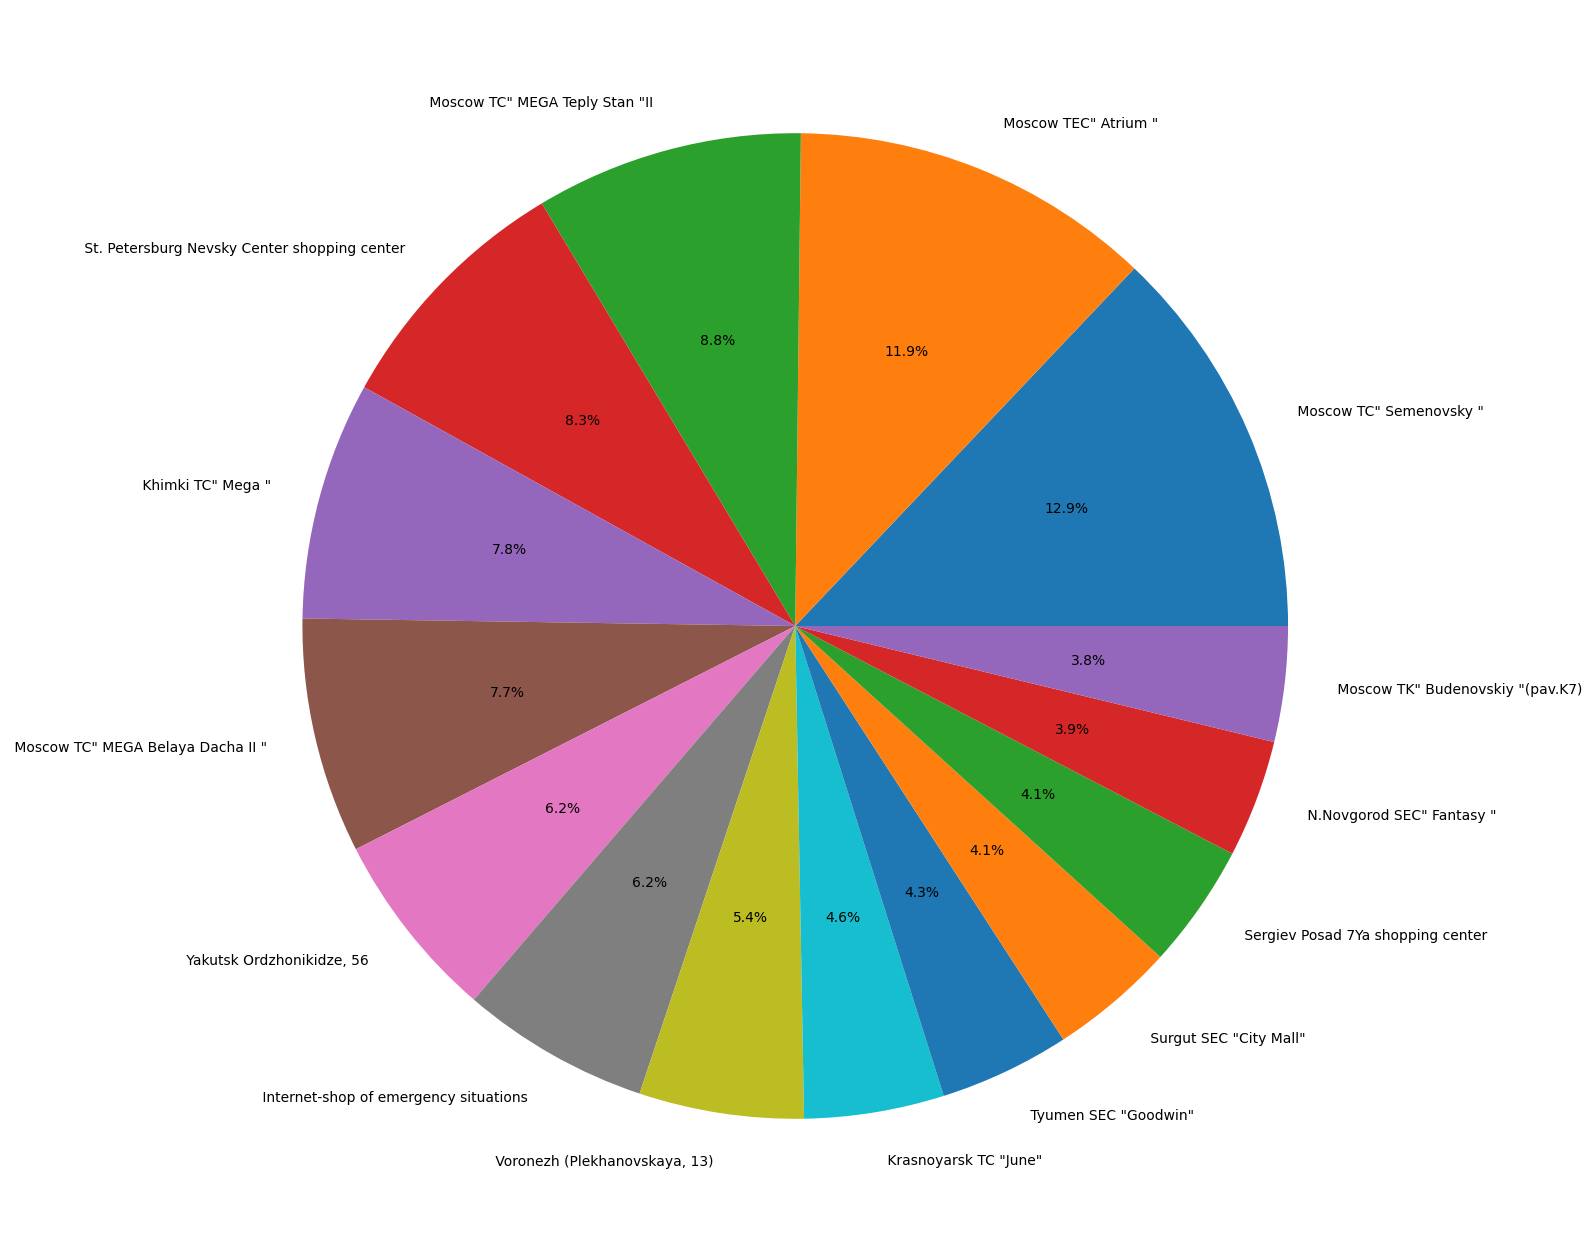

In [344]:
# top 15 sales per store
sales_per_store = final_dataset.groupby(['shop_name']).agg({'revenue': 'sum'})
sales_per_store = sales_per_store.nlargest(15, 'revenue', keep='first')
plt.figure(figsize=(16, 16))
plt.pie(sales_per_store['revenue'],
        labels=sales_per_store.index, autopct='%1.1f%%')
plt.title('')
top_sales_per_store_widget = pn.pane.Matplotlib(plt.gcf(), width=500)

sales_per_store = final_dataset.groupby(['shop_name']).agg({'revenue': 'sum'})
sales_per_store = sales_per_store.nlargest(15, 'revenue', keep='first')
sales_per_store = sales_per_store.reset_index()
sales_per_store['revenue'] = sales_per_store['revenue'].map('{:,.2f}'.format)
sales_per_store_markdown = tabulate(
    sales_per_store, tablefmt="pipe", headers="keys", showindex=False)
print(sales_per_store)

top_sales_per_store_text_widget = pn.pane.Markdown(
    f'''# Top 15 Stores by Sales:\n\n{sales_per_store_markdown}''')

In [345]:
# worst 5 stores by sales
sales_per_store = final_dataset.groupby(['shop_name']).agg({'revenue': 'sum'})
sales_per_store = sales_per_store.nsmallest(5, 'revenue', keep='first')
sales_per_store = sales_per_store.reset_index()
sales_per_store['revenue'] = sales_per_store['revenue'].map('{:,.2f}'.format)
sales_per_store_markdown = tabulate(
    sales_per_store, tablefmt="pipe", headers="keys", showindex=False)
print(sales_per_store)

worst_sales_per_store_text_widget = pn.pane.Markdown(
    f'''# Worst 5 Stores by Sales:\n\n{sales_per_store_markdown}''', width=500, height=100)

                                           shop_name       revenue
0             Novosibirsk SEC" Gallery Novosibirsk "    379,461.00
1                         Zhukovsky st. Chkalov 39m²    521,655.14
2                      Voronezh SEC City-Park "Grad"  2,353,301.00
3                        ! Yakutsk TC "Central" fran  3,238,207.00
4   RostovNaDon Megatsentr Gorizont Ostrovnoy sho...  4,308,355.72


In [346]:
blank_widget = pn.pane.Markdown('''# ''')

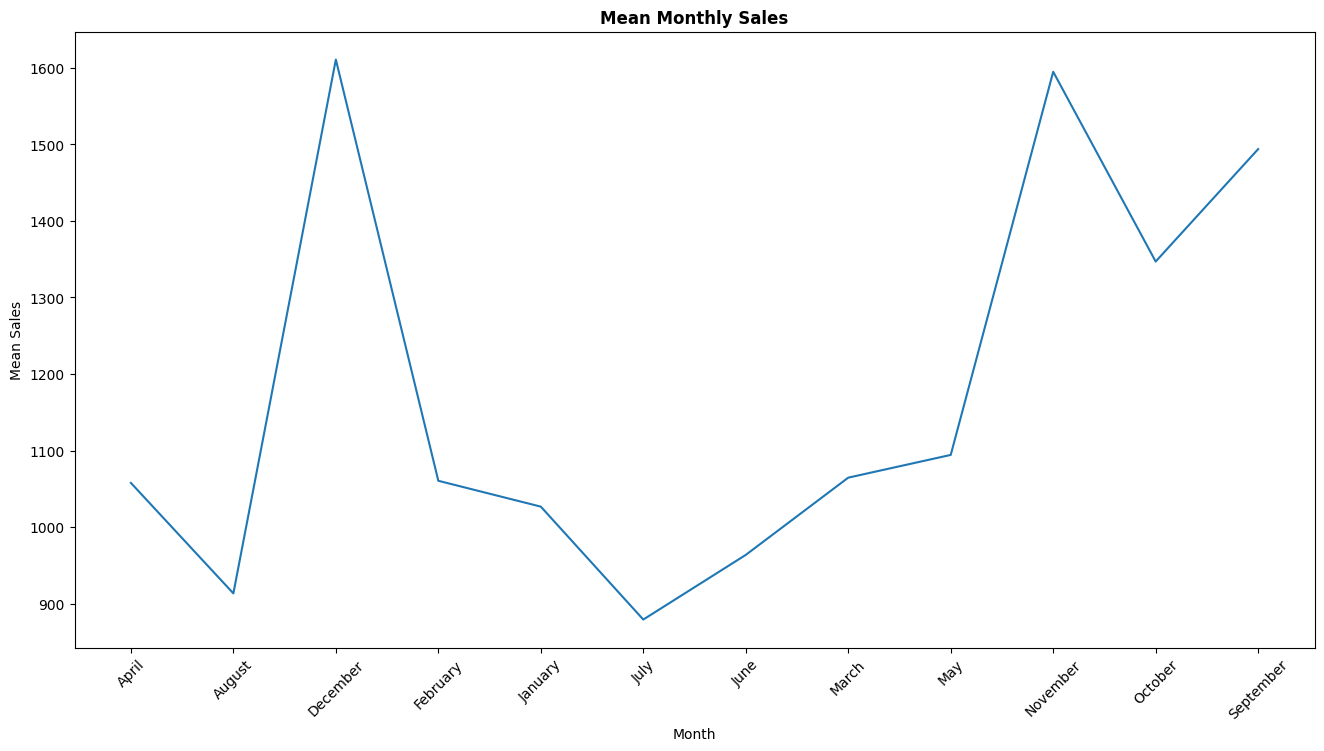

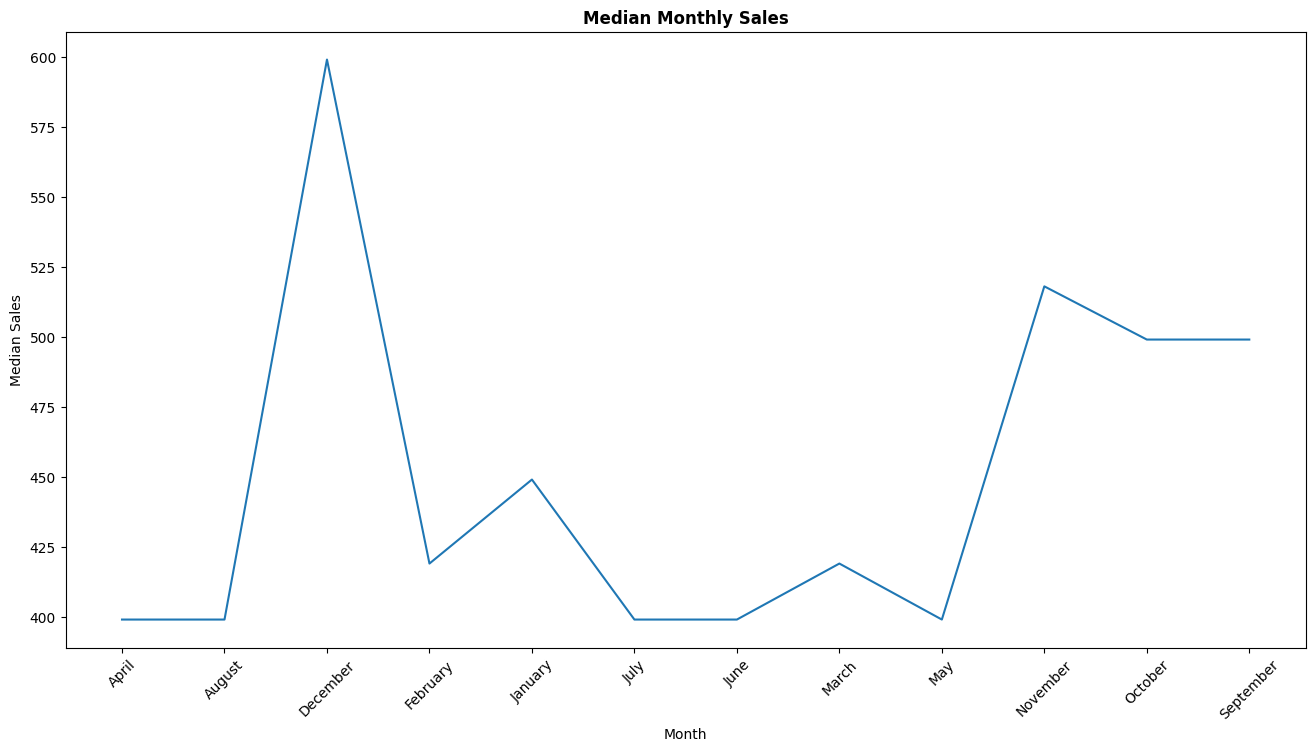

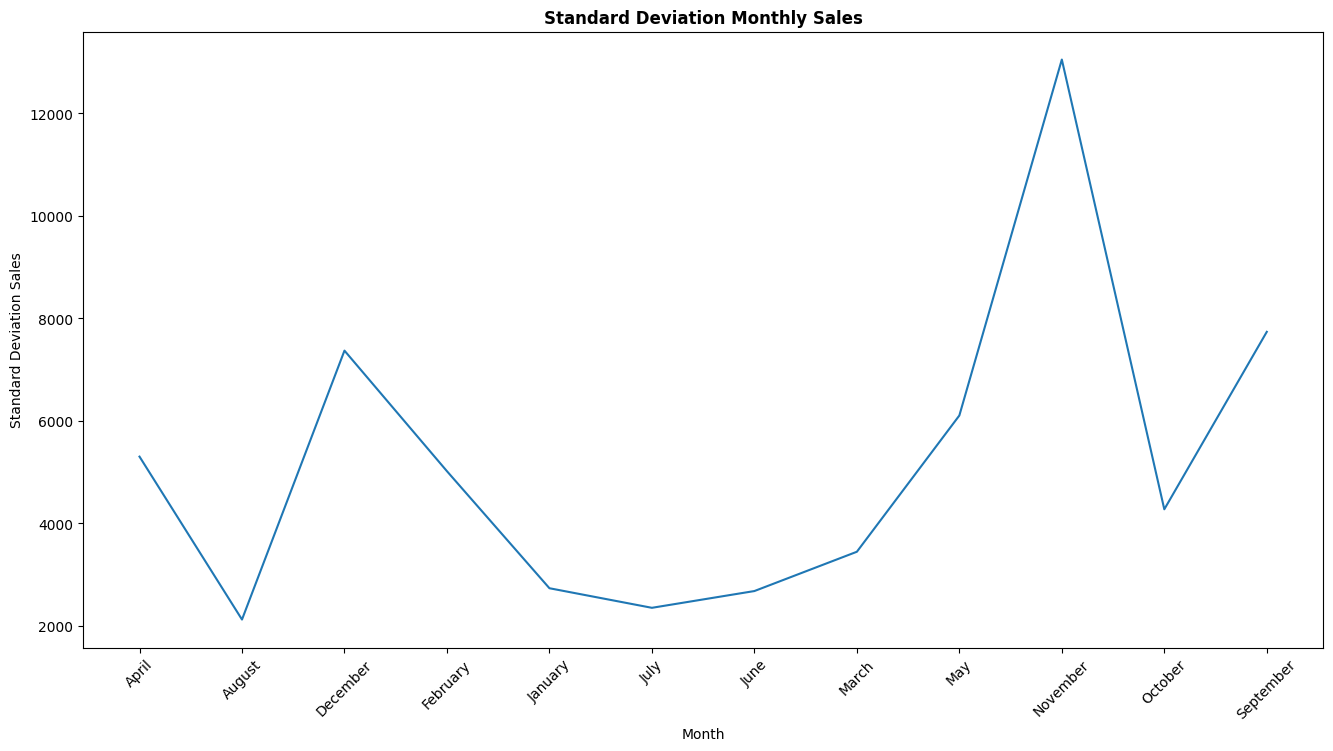

In [347]:
# montly sales analysis

# mean montly sales
monthly_sales = final_dataset.groupby(['month_name']).agg({'revenue': 'mean'})
monthly_sales = monthly_sales.reset_index()
plt.figure(figsize=(16, 8))
plt.plot(monthly_sales['month_name'], monthly_sales['revenue'])
plt.title('Mean Monthly Sales', fontweight='bold')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Mean Sales')
mean_monthly_sales_widget = pn.pane.Matplotlib(plt.gcf(), width=500)

# median montly sales
monthly_sales = final_dataset.groupby(
    ['month_name']).agg({'revenue': 'median'})
monthly_sales = monthly_sales.reset_index()
plt.figure(figsize=(16, 8))
plt.plot(monthly_sales['month_name'], monthly_sales['revenue'])
plt.title('Median Monthly Sales', fontweight='bold')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Median Sales')
median_monthly_sales_widget = pn.pane.Matplotlib(plt.gcf(), width=500)

# standard deviation montly sales
monthly_sales = final_dataset.groupby(['month_name']).agg({'revenue': 'std'})
monthly_sales = monthly_sales.reset_index()
plt.figure(figsize=(16, 8))
plt.plot(monthly_sales['month_name'], monthly_sales['revenue'])
plt.title('Standard Deviation Monthly Sales', fontweight='bold')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Standard Deviation Sales')
std_monthly_sales_widget = pn.pane.Matplotlib(plt.gcf(), width=500)

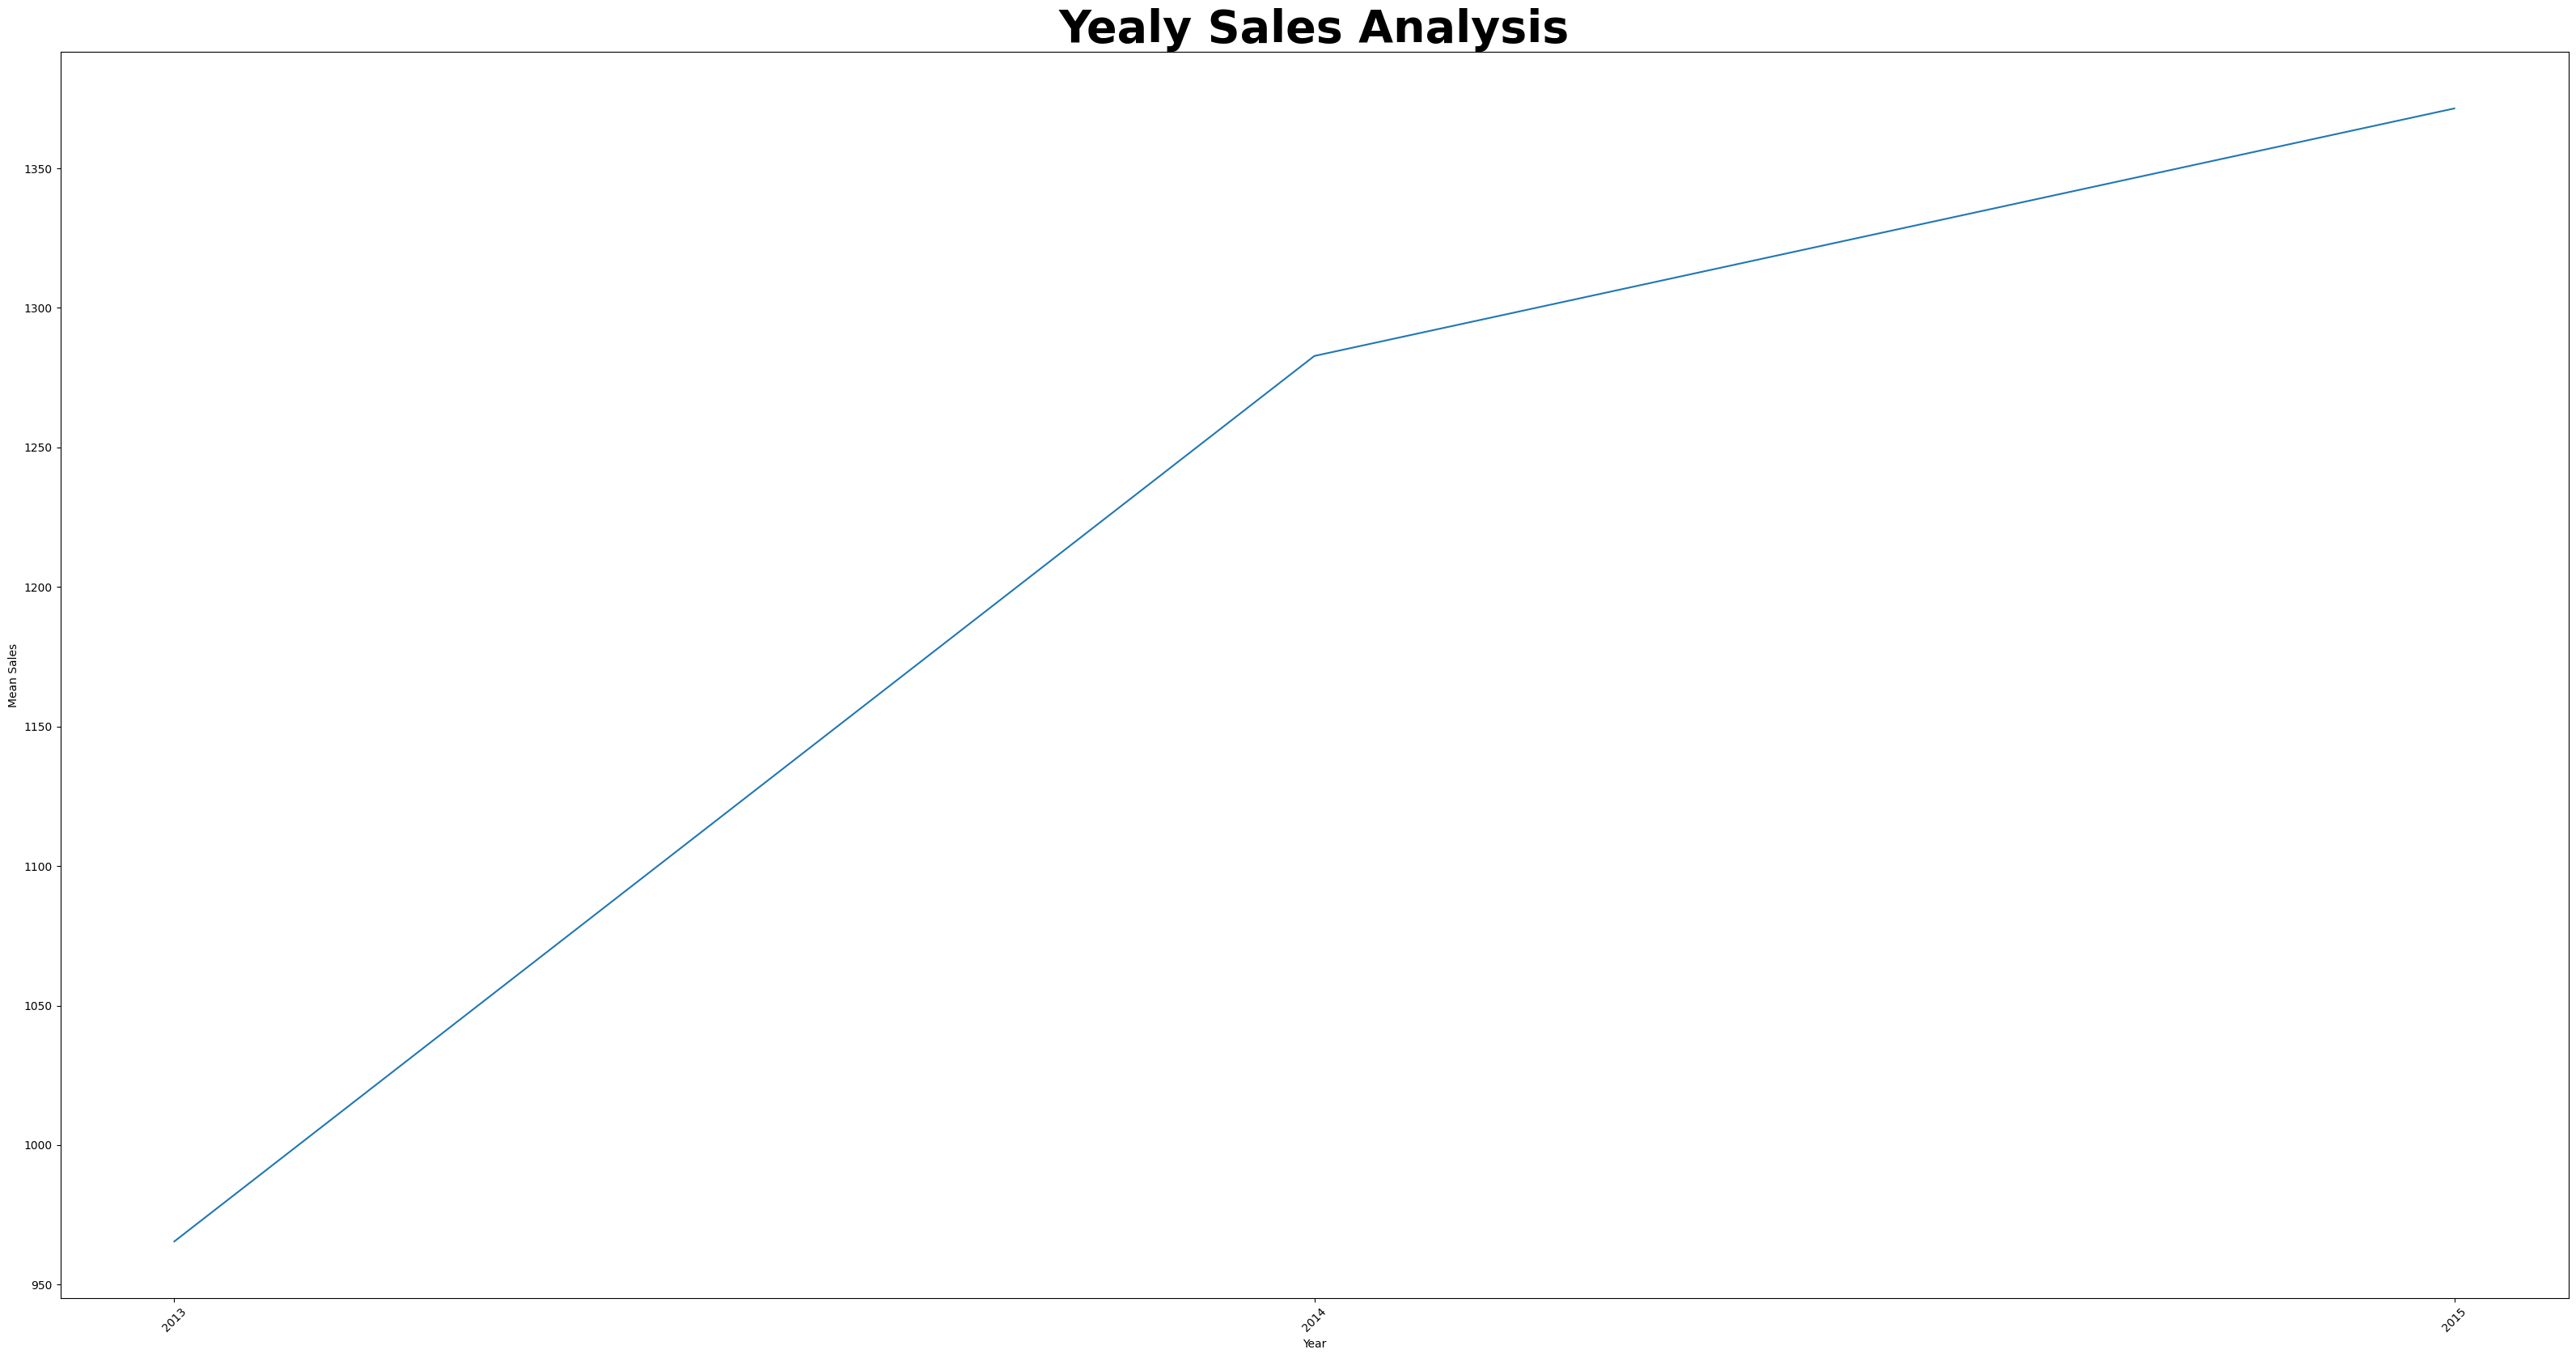

In [348]:
# mean sales across the years
monthly_sales = final_dataset.groupby(['year_num']).agg({'revenue': 'mean'})
monthly_sales = monthly_sales.reset_index()
plt.figure(figsize=(40, 20))
plt.plot(monthly_sales['year_num'], monthly_sales['revenue'])
plt.title('Yealy Sales Analysis', fontweight='bold', fontsize=40)
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Mean Sales')
mean_yearly_sales_widget = pn.pane.Matplotlib(plt.gcf(), width=800)

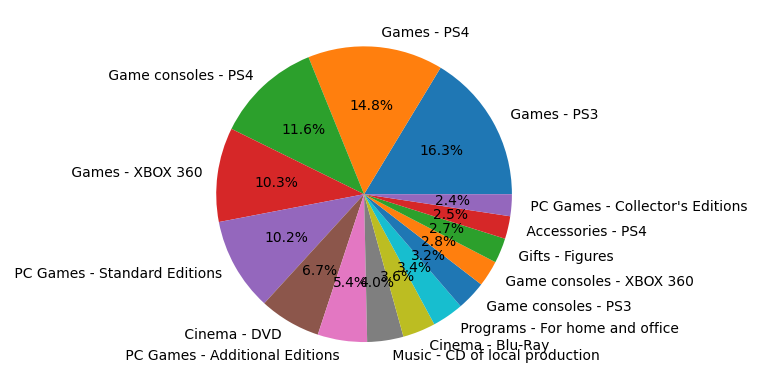

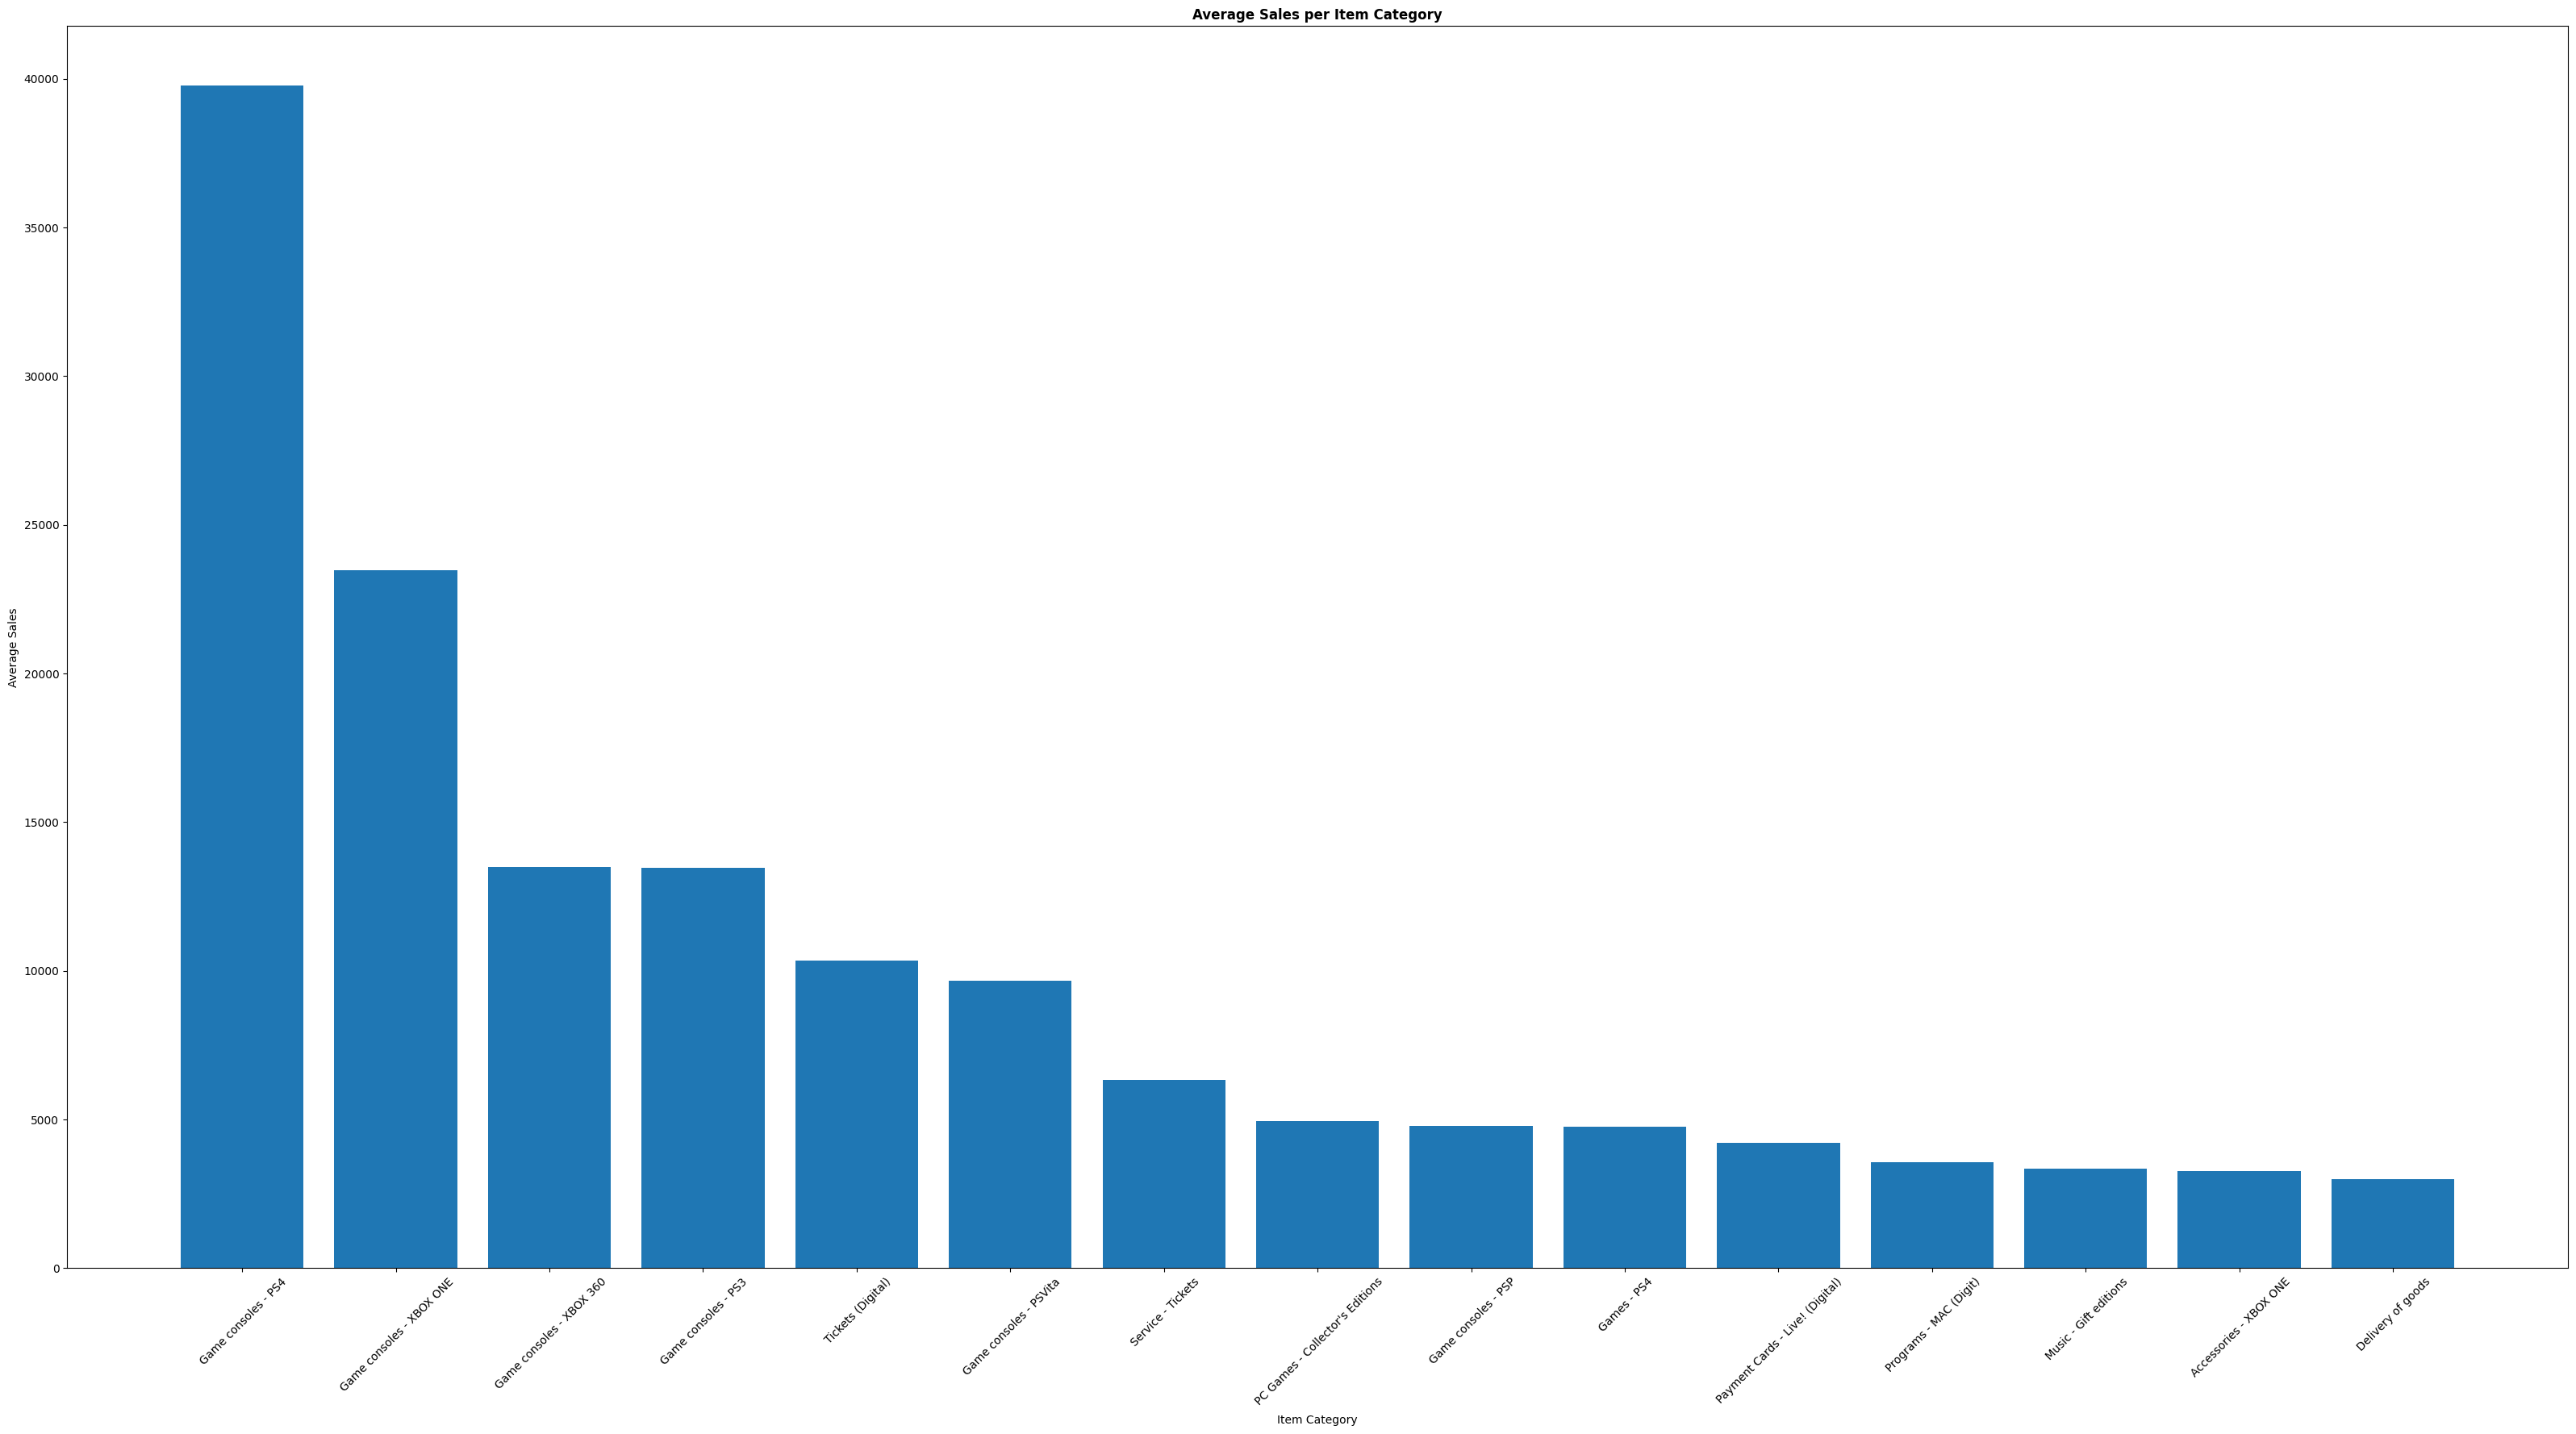

In [349]:
#item category analysis

# top item categories by sales
sales_per_item_category = final_dataset.groupby(['item_category_name']).agg({'revenue': 'sum'})
top_sales_per_item_category = sales_per_item_category.nlargest(15, 'revenue', keep='first')
plt.figure()
plt.pie(top_sales_per_item_category['revenue'],
        labels=top_sales_per_item_category.index, autopct='%1.1f%%')
plt.title('')
top_sales_per_item_category_widget = pn.pane.Matplotlib(plt.gcf(), width=600)

# average sales per item category
sales_per_item_category = final_dataset.groupby(['item_category_name']).agg({'revenue': 'mean'})
sales_per_item_category = sales_per_item_category.nlargest(15, 'revenue', keep='first')
sales_per_item_category = sales_per_item_category.reset_index()
plt.figure(figsize=(40,20))
plt.bar(sales_per_item_category['item_category_name'], sales_per_item_category['revenue'])
plt.title('Average Sales per Item Category', fontweight='bold')
plt.xlabel('Item Category')
plt.xticks(rotation=45)
plt.ylabel('Average Sales')
average_sales_per_item_category_widget = pn.pane.Matplotlib(plt.gcf(), width=1000, height=500)

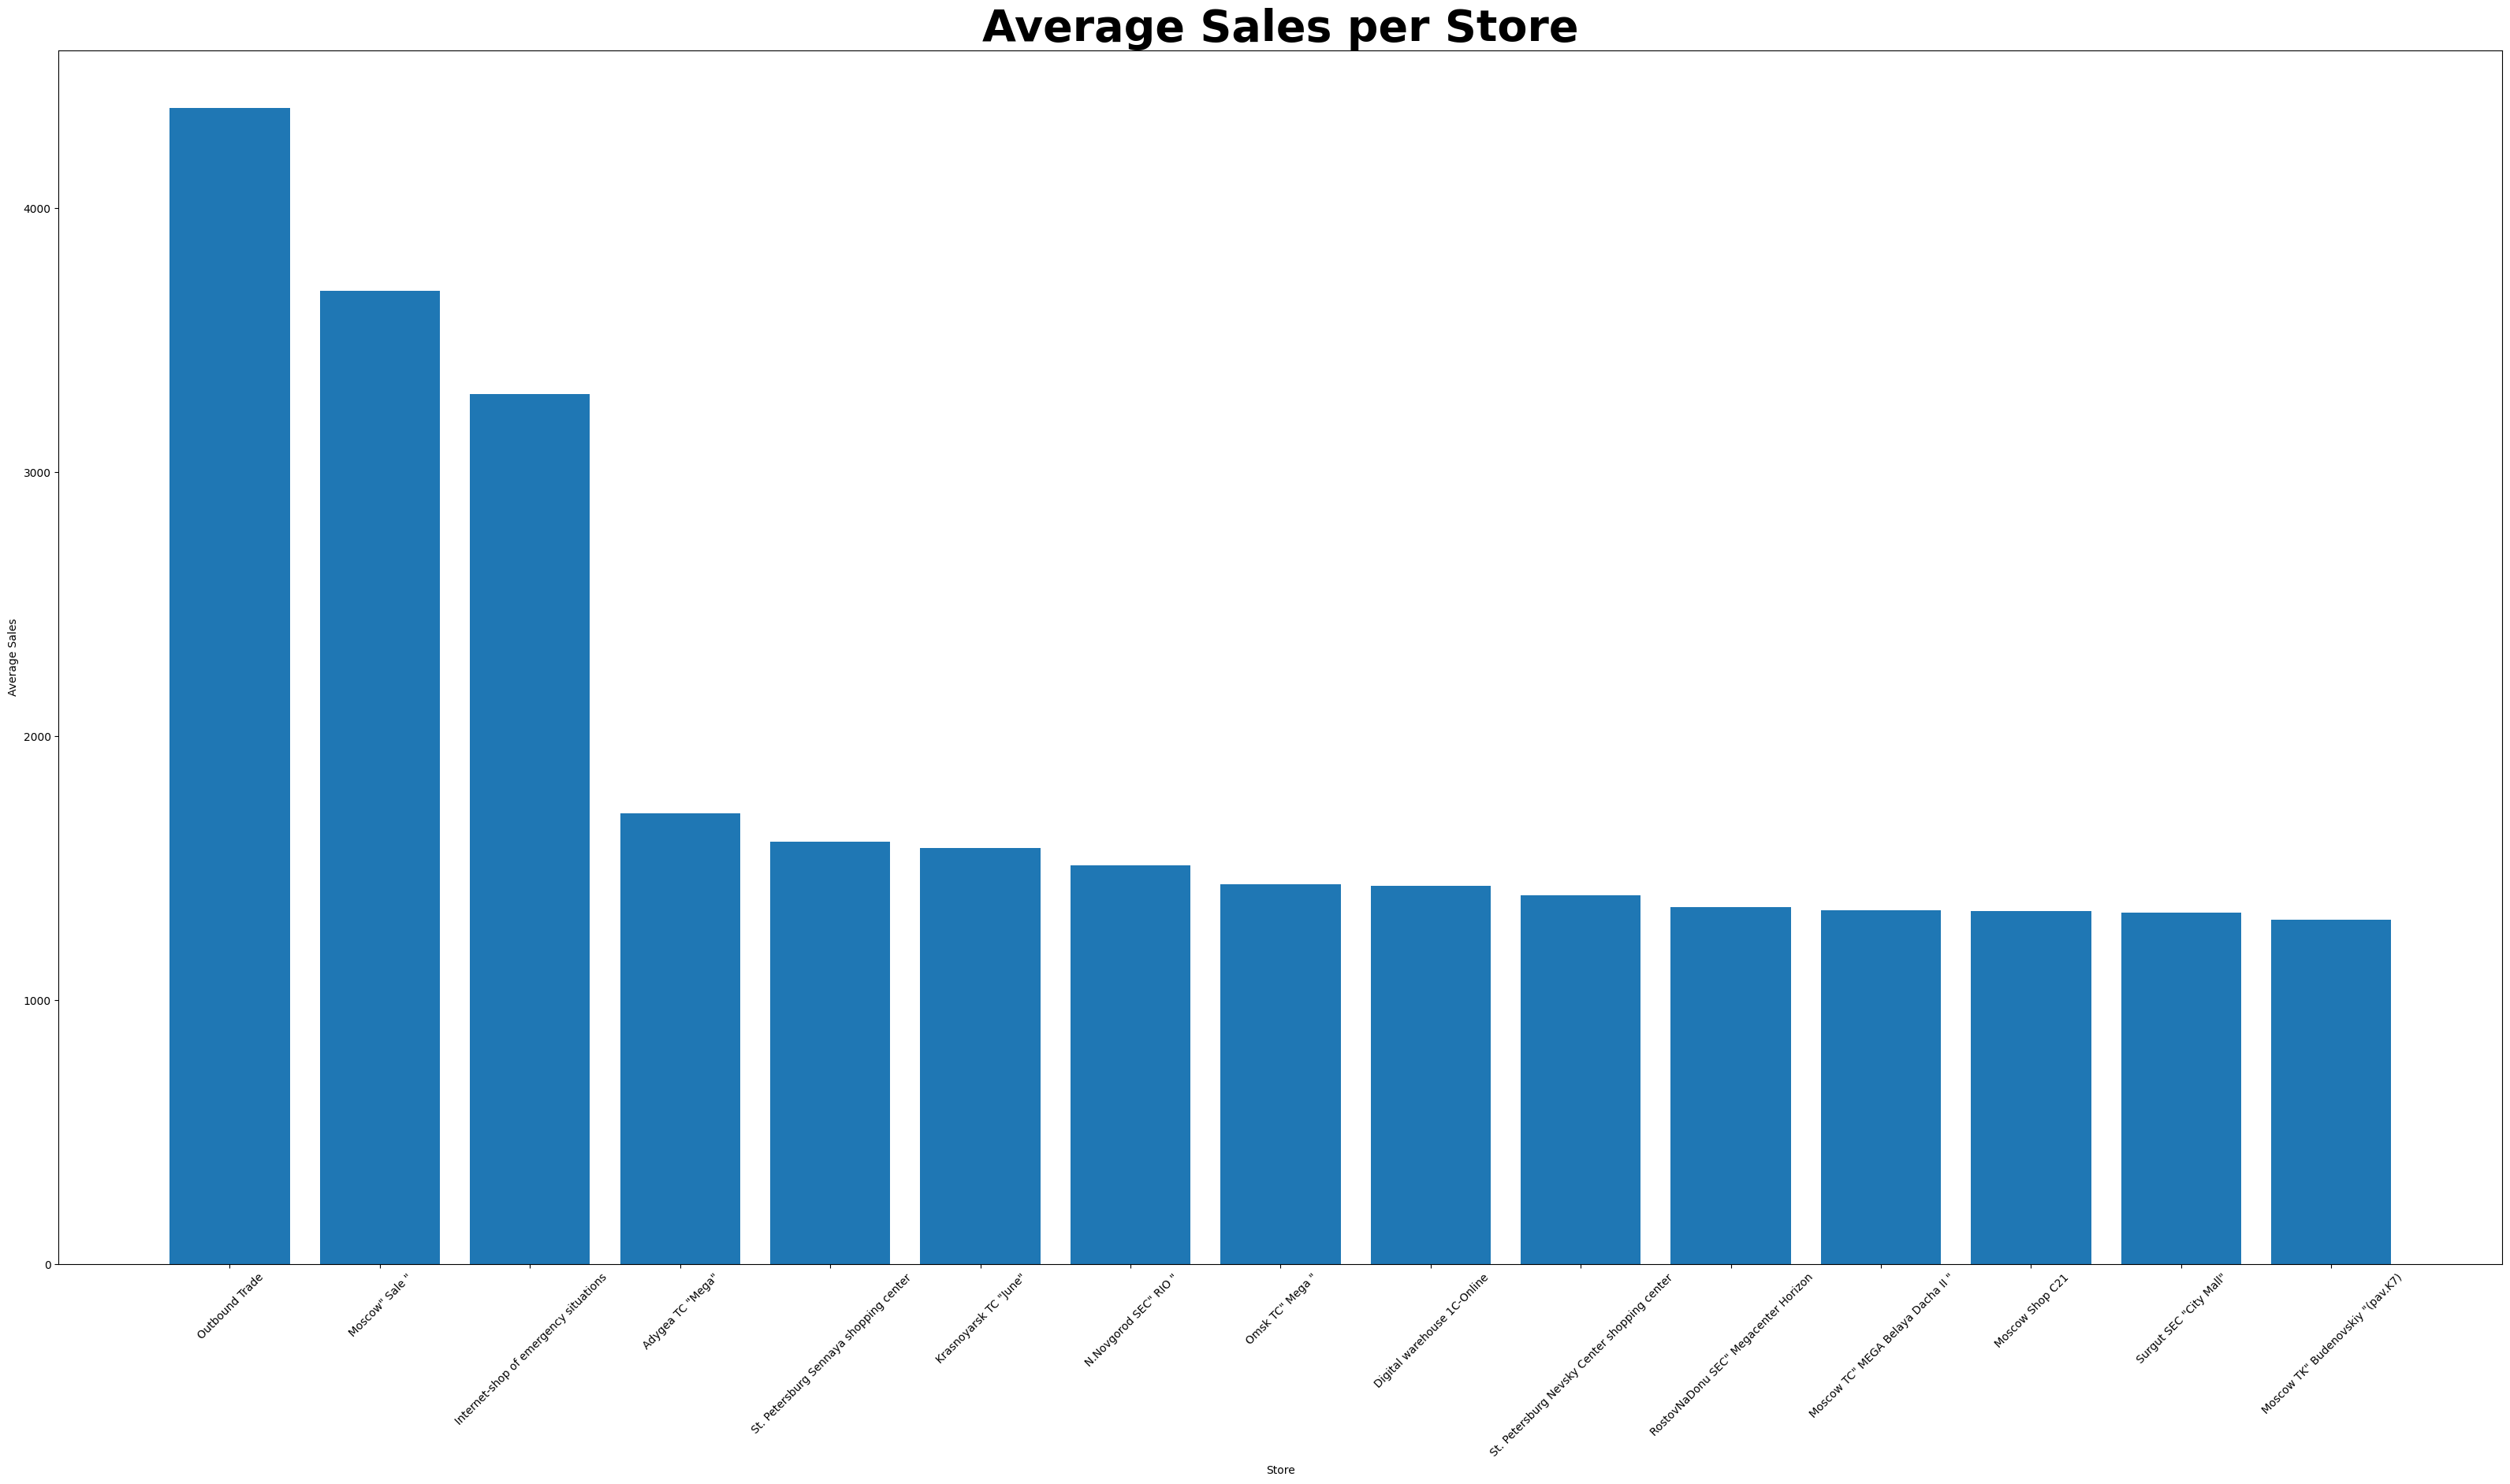

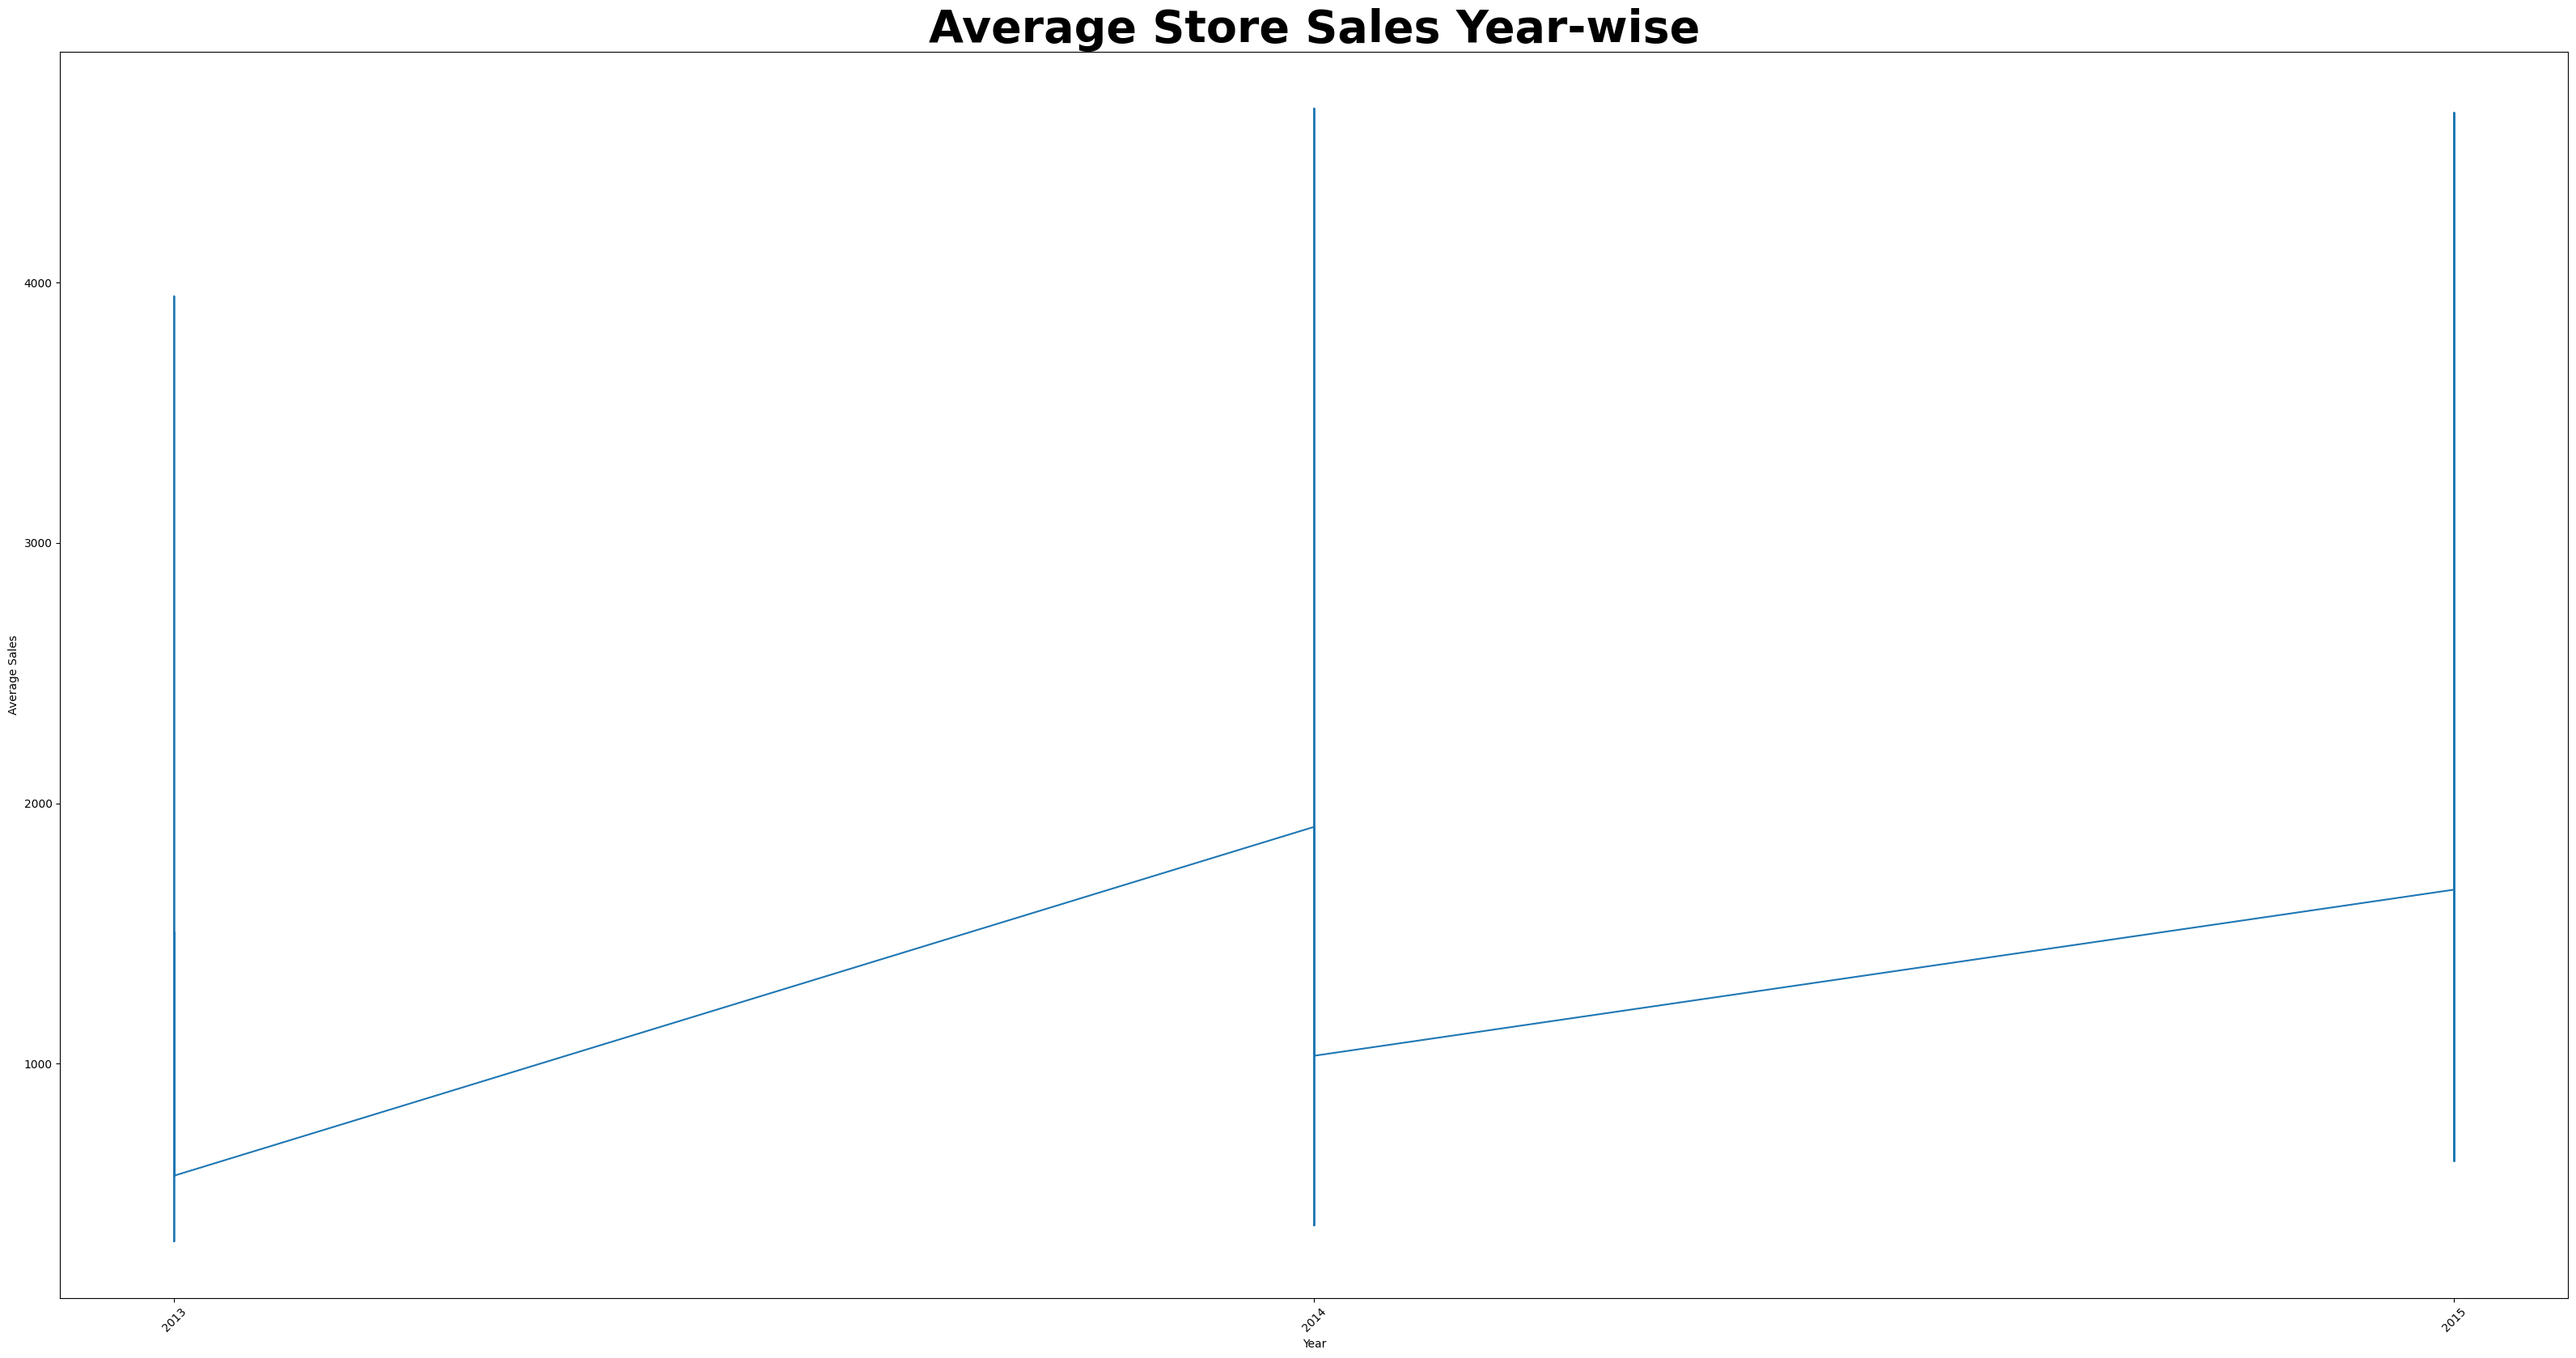

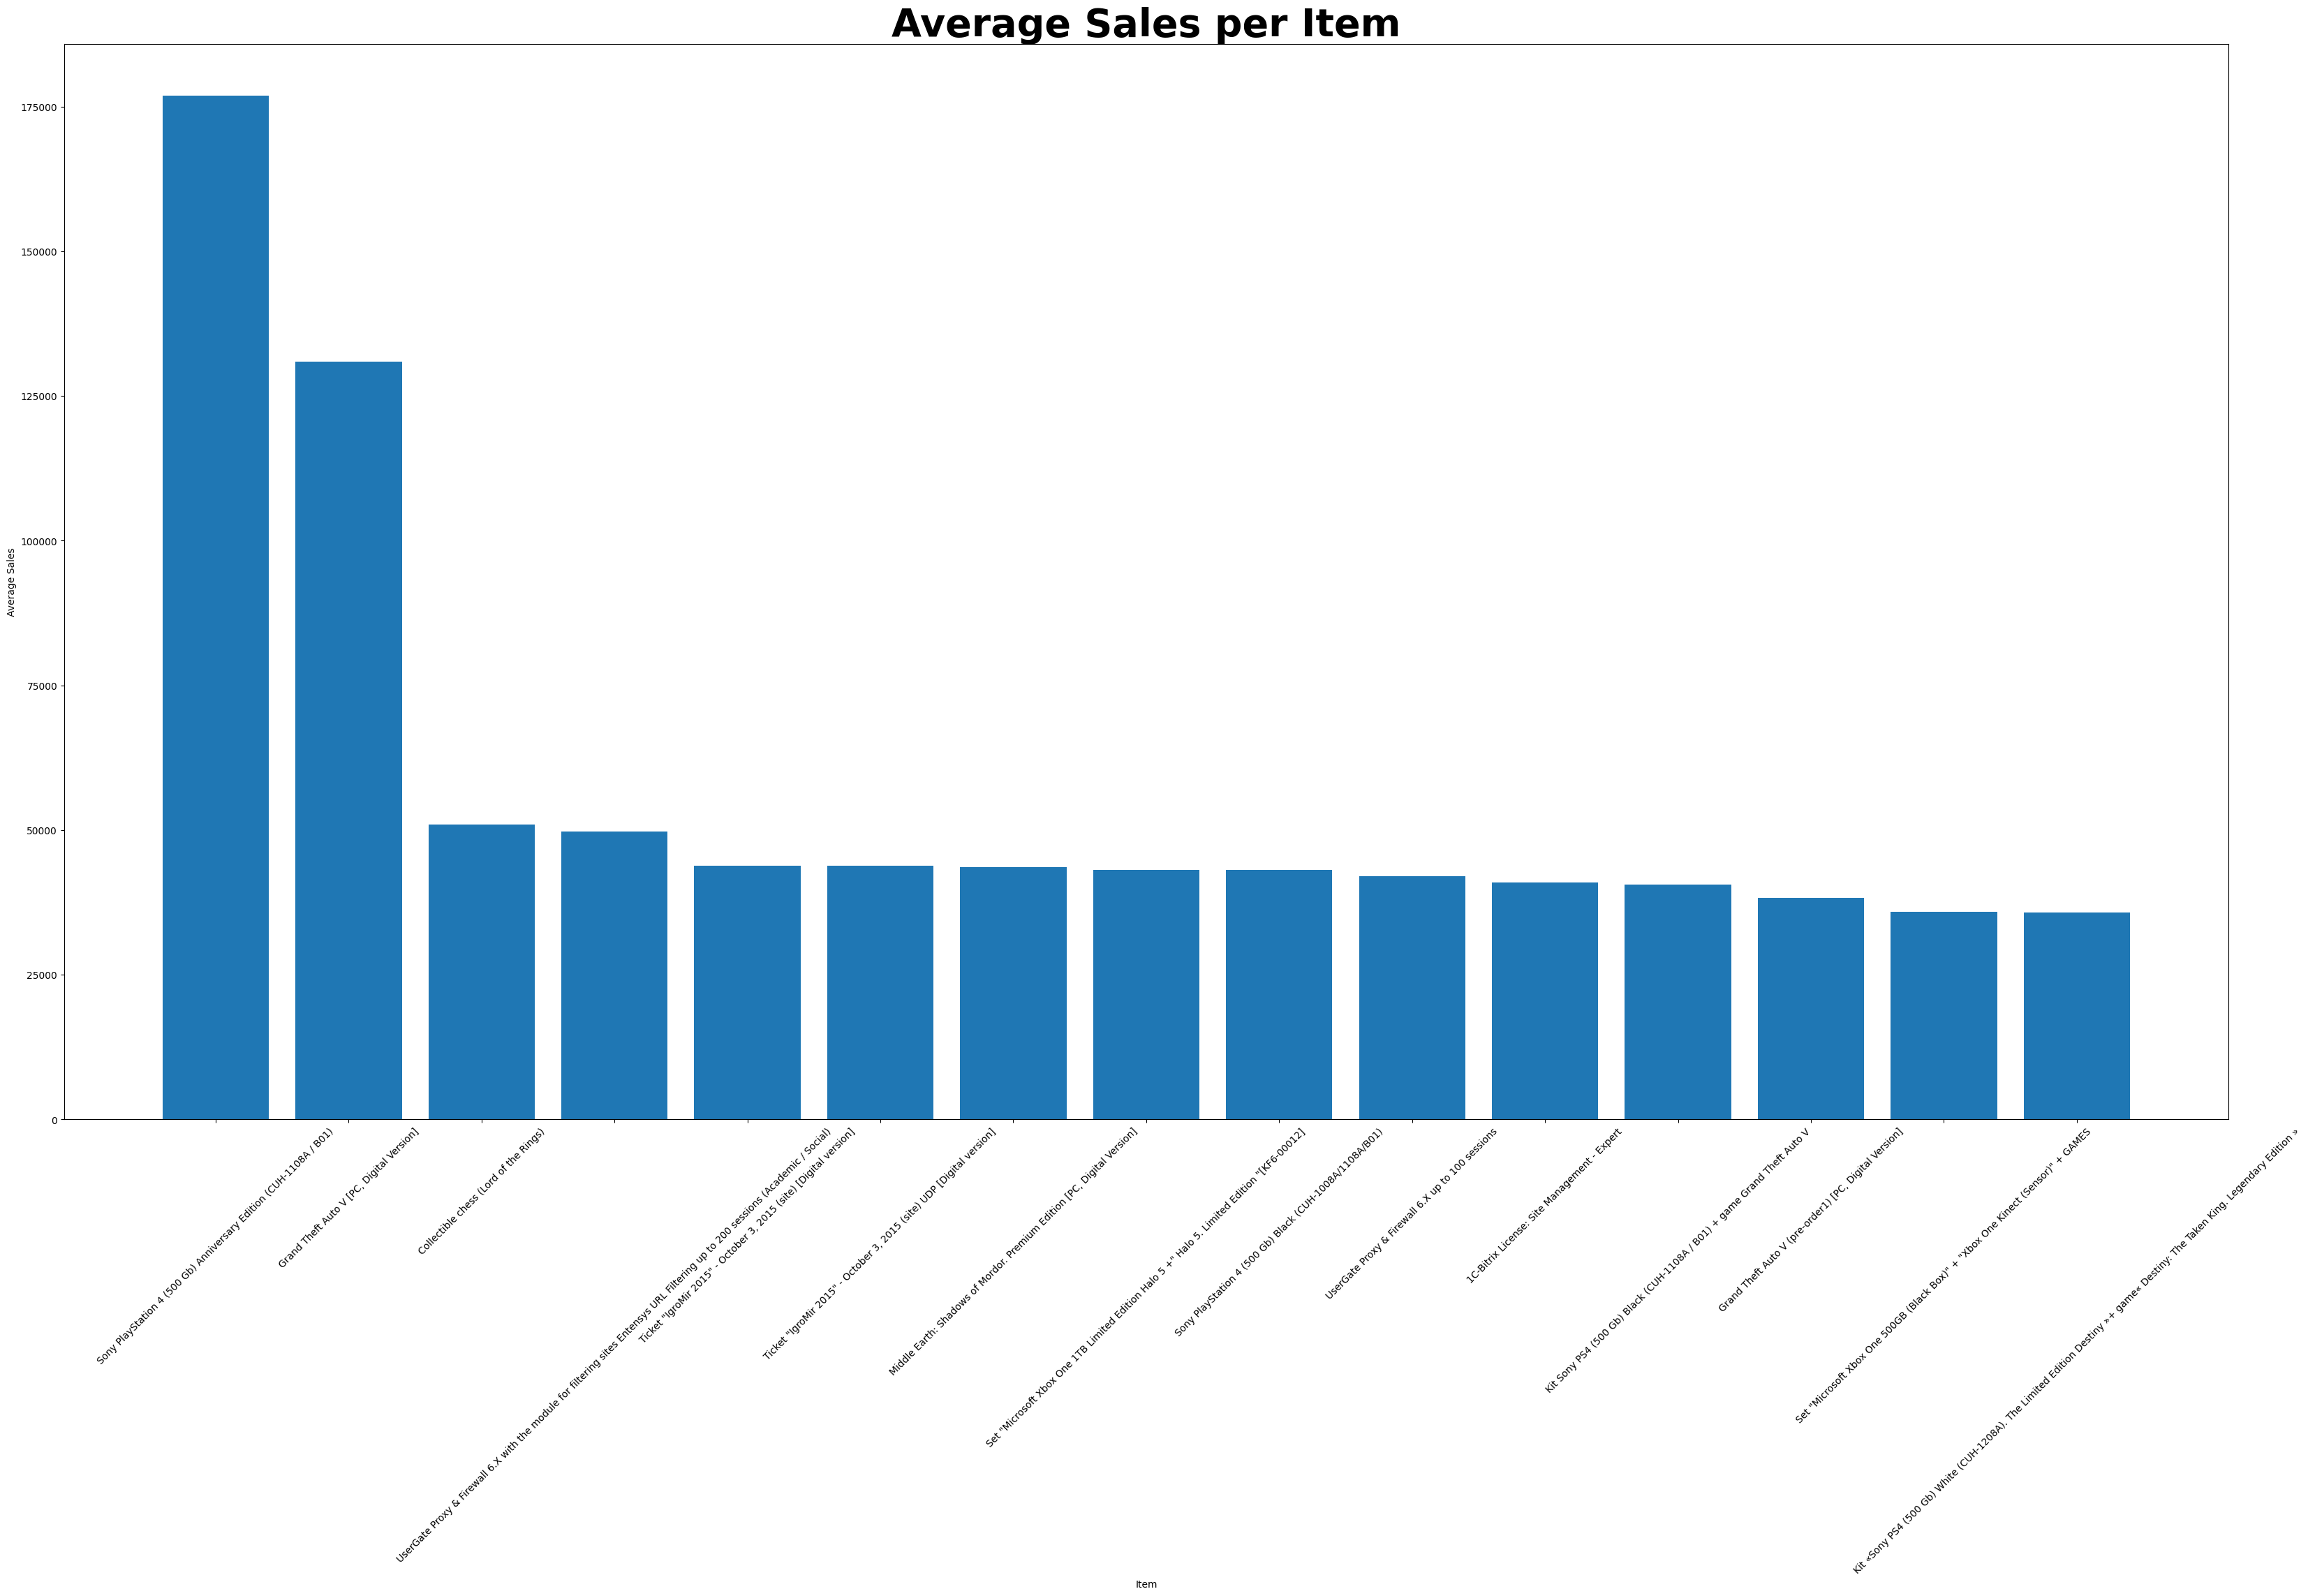

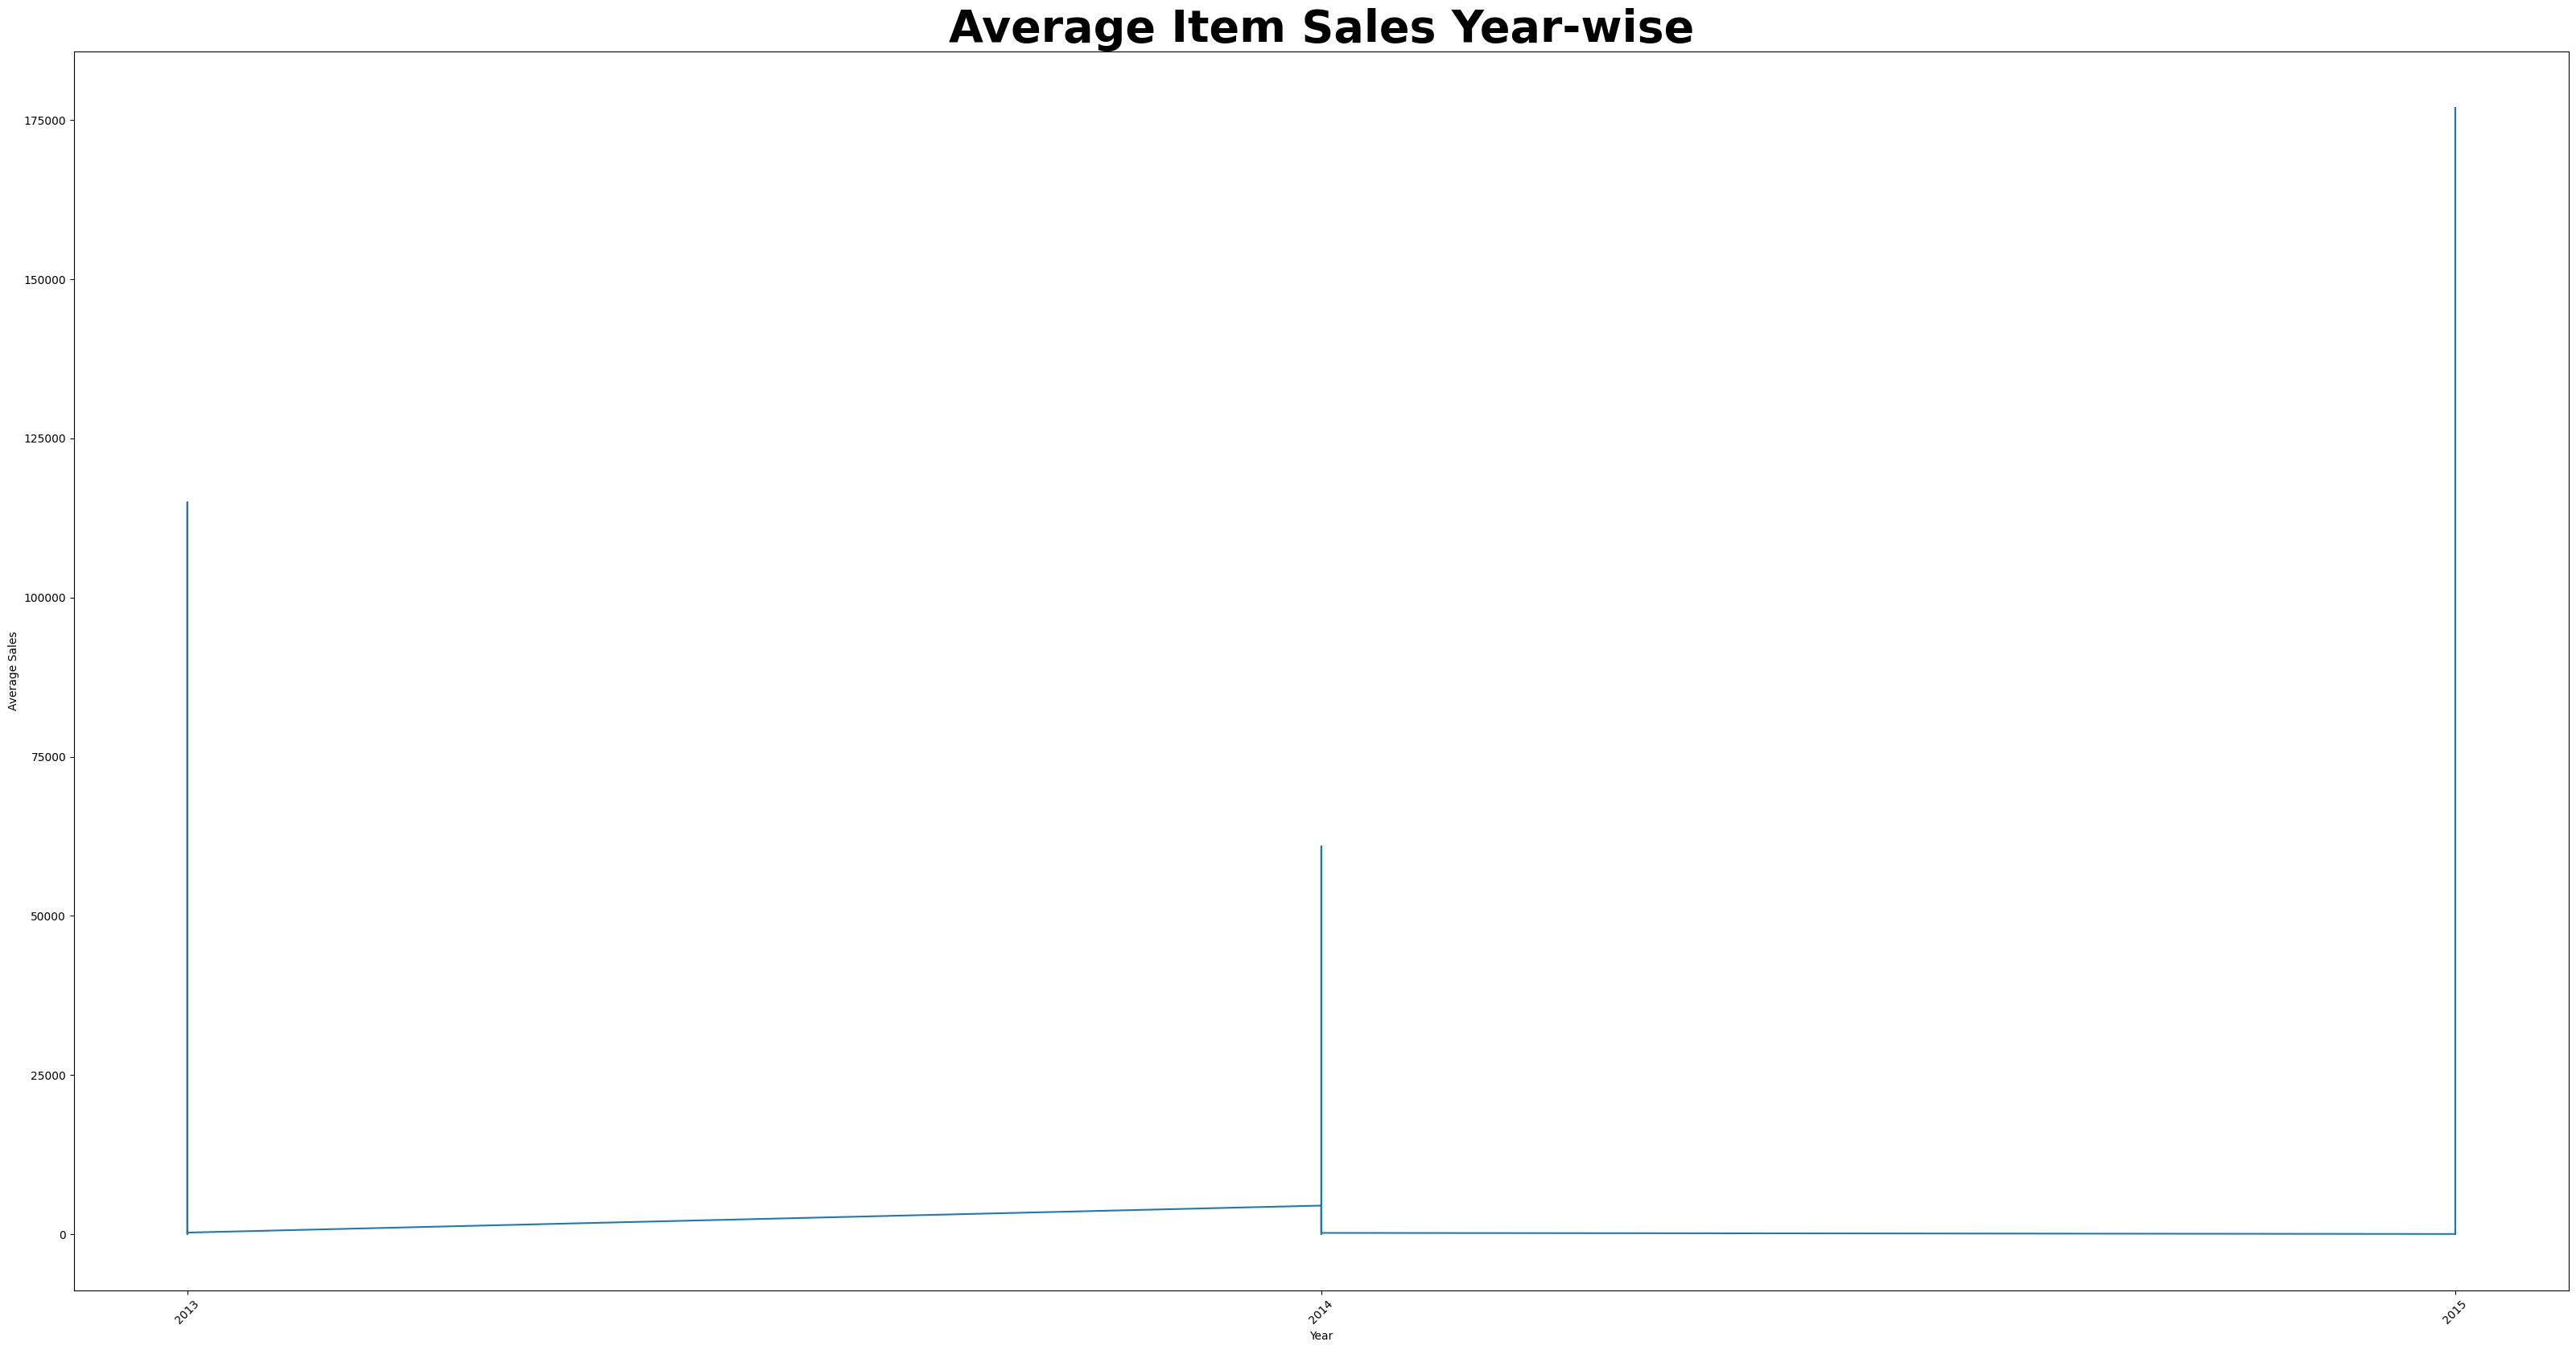

In [350]:
#average sales metrics

# average sales per store
sales_per_store = final_dataset.groupby(['shop_name']).agg({'revenue': 'mean'})
sales_per_store = sales_per_store.nlargest(15, 'revenue', keep='first')
sales_per_store = sales_per_store.reset_index()
plt.figure(figsize=(40,20))
plt.bar(sales_per_store['shop_name'], sales_per_store['revenue'])
plt.title('Average Sales per Store', fontweight='bold', fontsize=40)
plt.xlabel('Store')
plt.xticks(rotation=45)
plt.ylabel('Average Sales')
average_sales_per_store_widget = pn.pane.Matplotlib(plt.gcf(), width=750, height=375)

# average store sales year-wise
sales_per_store = final_dataset.groupby(['year_num', 'shop_name']).agg({'revenue': 'mean'})
sales_per_store = sales_per_store.reset_index()
plt.figure(figsize=(40,20))
plt.plot(sales_per_store['year_num'], sales_per_store['revenue'])
plt.title('Average Store Sales Year-wise', fontweight='bold', fontsize=40)
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Average Sales')
average_sales_per_store_yearly_widget = pn.pane.Matplotlib(plt.gcf(), width=750, height=375)

# average sales per item
sales_per_item = final_dataset.groupby(['item_name']).agg({'revenue': 'mean'})
sales_per_item = sales_per_item.nlargest(15, 'revenue', keep='first')
sales_per_item = sales_per_item.reset_index()
plt.figure(figsize=(40,20))
plt.bar(sales_per_item['item_name'], sales_per_item['revenue'])
plt.title('Average Sales per Item', fontweight='bold', fontsize=40)
plt.xlabel('Item')
plt.xticks(rotation=45)
plt.ylabel('Average Sales')
average_sales_per_item_widget = pn.pane.Matplotlib(plt.gcf(), width=750, height=375)

# average item sales year-wise
sales_per_item = final_dataset.groupby(['year_num', 'item_name']).agg({'revenue': 'mean'})
sales_per_item = sales_per_item.reset_index()
plt.figure(figsize=(40,20))
plt.plot(sales_per_item['year_num'], sales_per_item['revenue'])
plt.title('Average Item Sales Year-wise', fontweight='bold', fontsize=40)
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Average Sales')
average_sales_per_item_yearly_widget = pn.pane.Matplotlib(plt.gcf(), width=750, height=375)

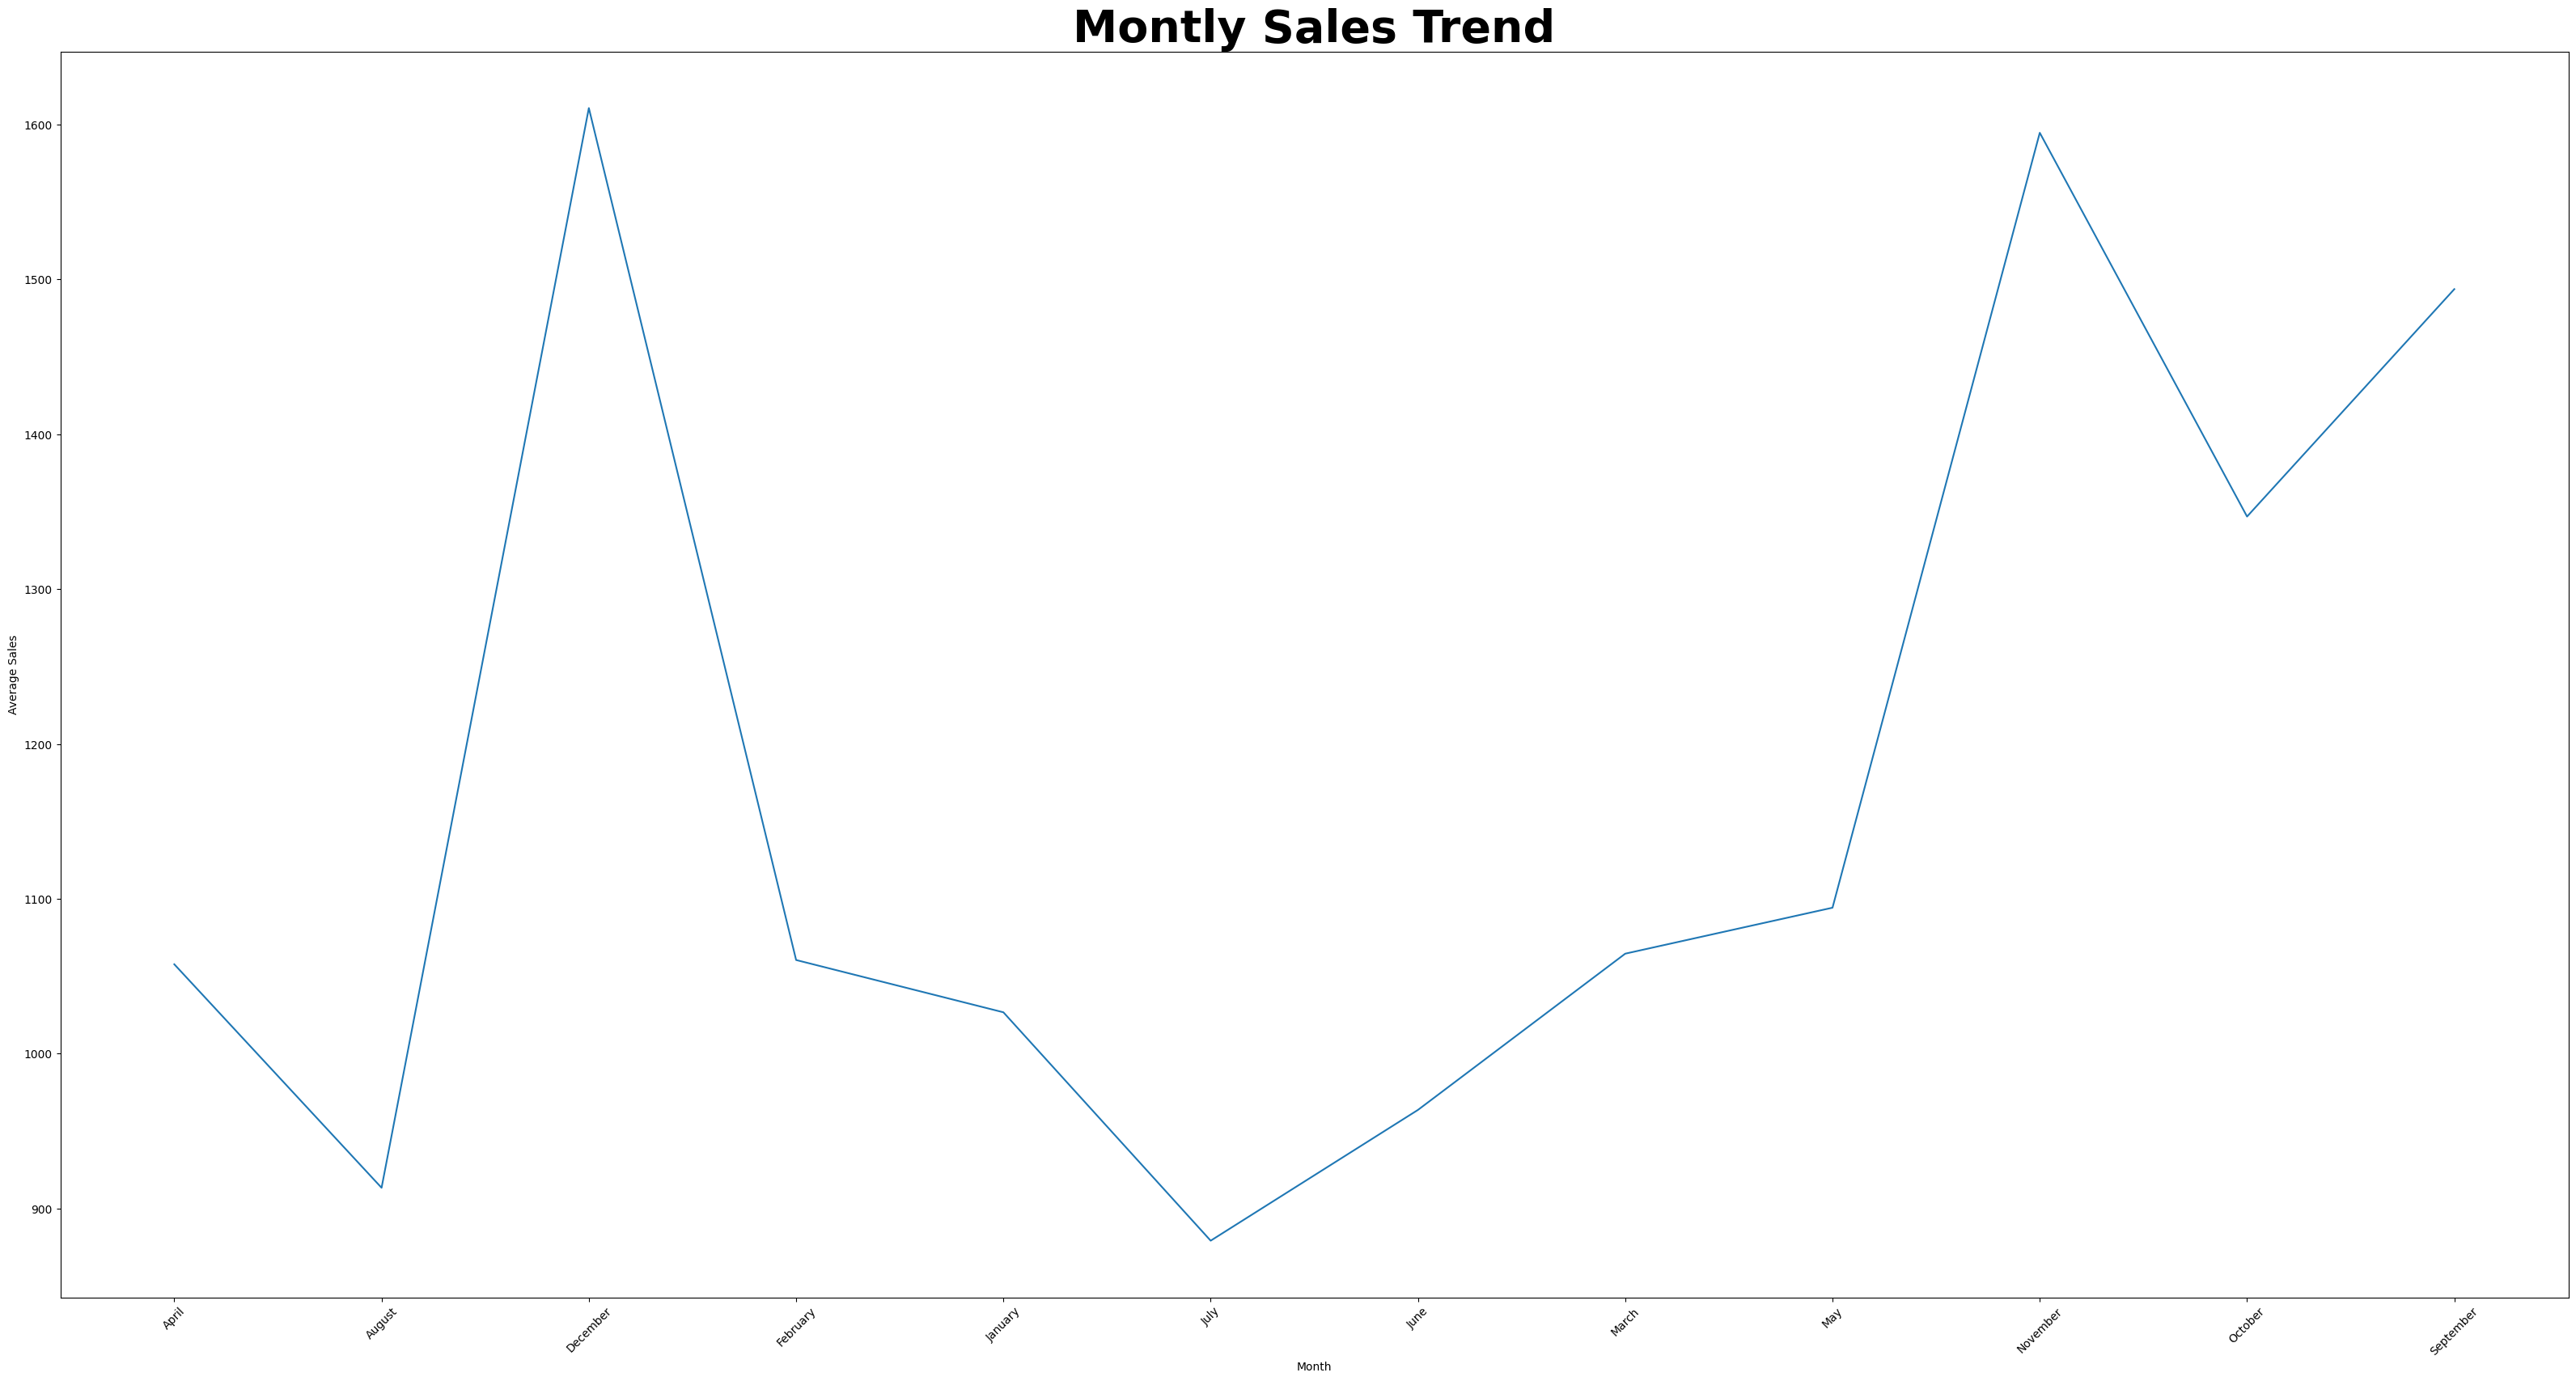

In [351]:
# relationship between month of year and avergae sales
sales_per_month = final_dataset.groupby(['month_name']).agg({'revenue': 'mean'})
sales_per_month = sales_per_month.reset_index()
plt.figure(figsize=(40,20))
plt.plot(sales_per_month['month_name'], sales_per_month['revenue'])
plt.title('Montly Sales Trend', fontweight='bold', fontsize=40)
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Average Sales')
average_sales_per_month_widget = pn.pane.Matplotlib(plt.gcf(), width=800, height=400)

In [352]:
#Additional Insights - mean, median, and standard deviation for each available numeric column

numeric_columns = final_dataset.select_dtypes(include=['float64', 'int64'])

array = []

for column in numeric_columns:
    mean = final_dataset[column].mean()
    mean = round(mean, 2)
    mean = f'{mean}'
    print(mean)

    median = final_dataset[column].median()
    median = round(median, 2)
    median = f'{median}'
    print(median)

    std = final_dataset[column].std()
    std = round(std, 2)
    std = f'{std}'
    print(std)

    array.append([column, mean, median, std])

additional_insights = pd.DataFrame(
    array, columns=['Column', 'Mean', 'Median', 'Standard Deviation'])
additional_insights_markdown = tabulate(
    additional_insights, tablefmt="pipe", headers="keys", showindex=False)
print(additional_insights)

additional_insights_widget = pn.pane.Markdown(
    f'''# Additional Insights:\n\n{additional_insights_markdown}''', width=800)


15.85
16.0
8.92
33.0
31.0
16.23
10200.28
9355.0
6324.39
40.02
40.0
17.1
889.36
399.0
1718.16
1.25
1.0
2.22
1164.27
449.0
5684.85
6.25
6.11
1.17
0.0
0.0
0.0
           Column      Mean  Median Standard Deviation
0        date_num     15.85    16.0               8.92
1         shop_id      33.0    31.0              16.23
2         item_id  10200.28  9355.0            6324.39
3     category_id     40.02    40.0               17.1
4      item_price    889.36   399.0            1718.16
5  item_cnt_month      1.25     1.0               2.22
6         revenue   1164.27   449.0            5684.85
7     log_revenue      6.25    6.11               1.17
8  scaled_revenue       0.0     0.0                0.0


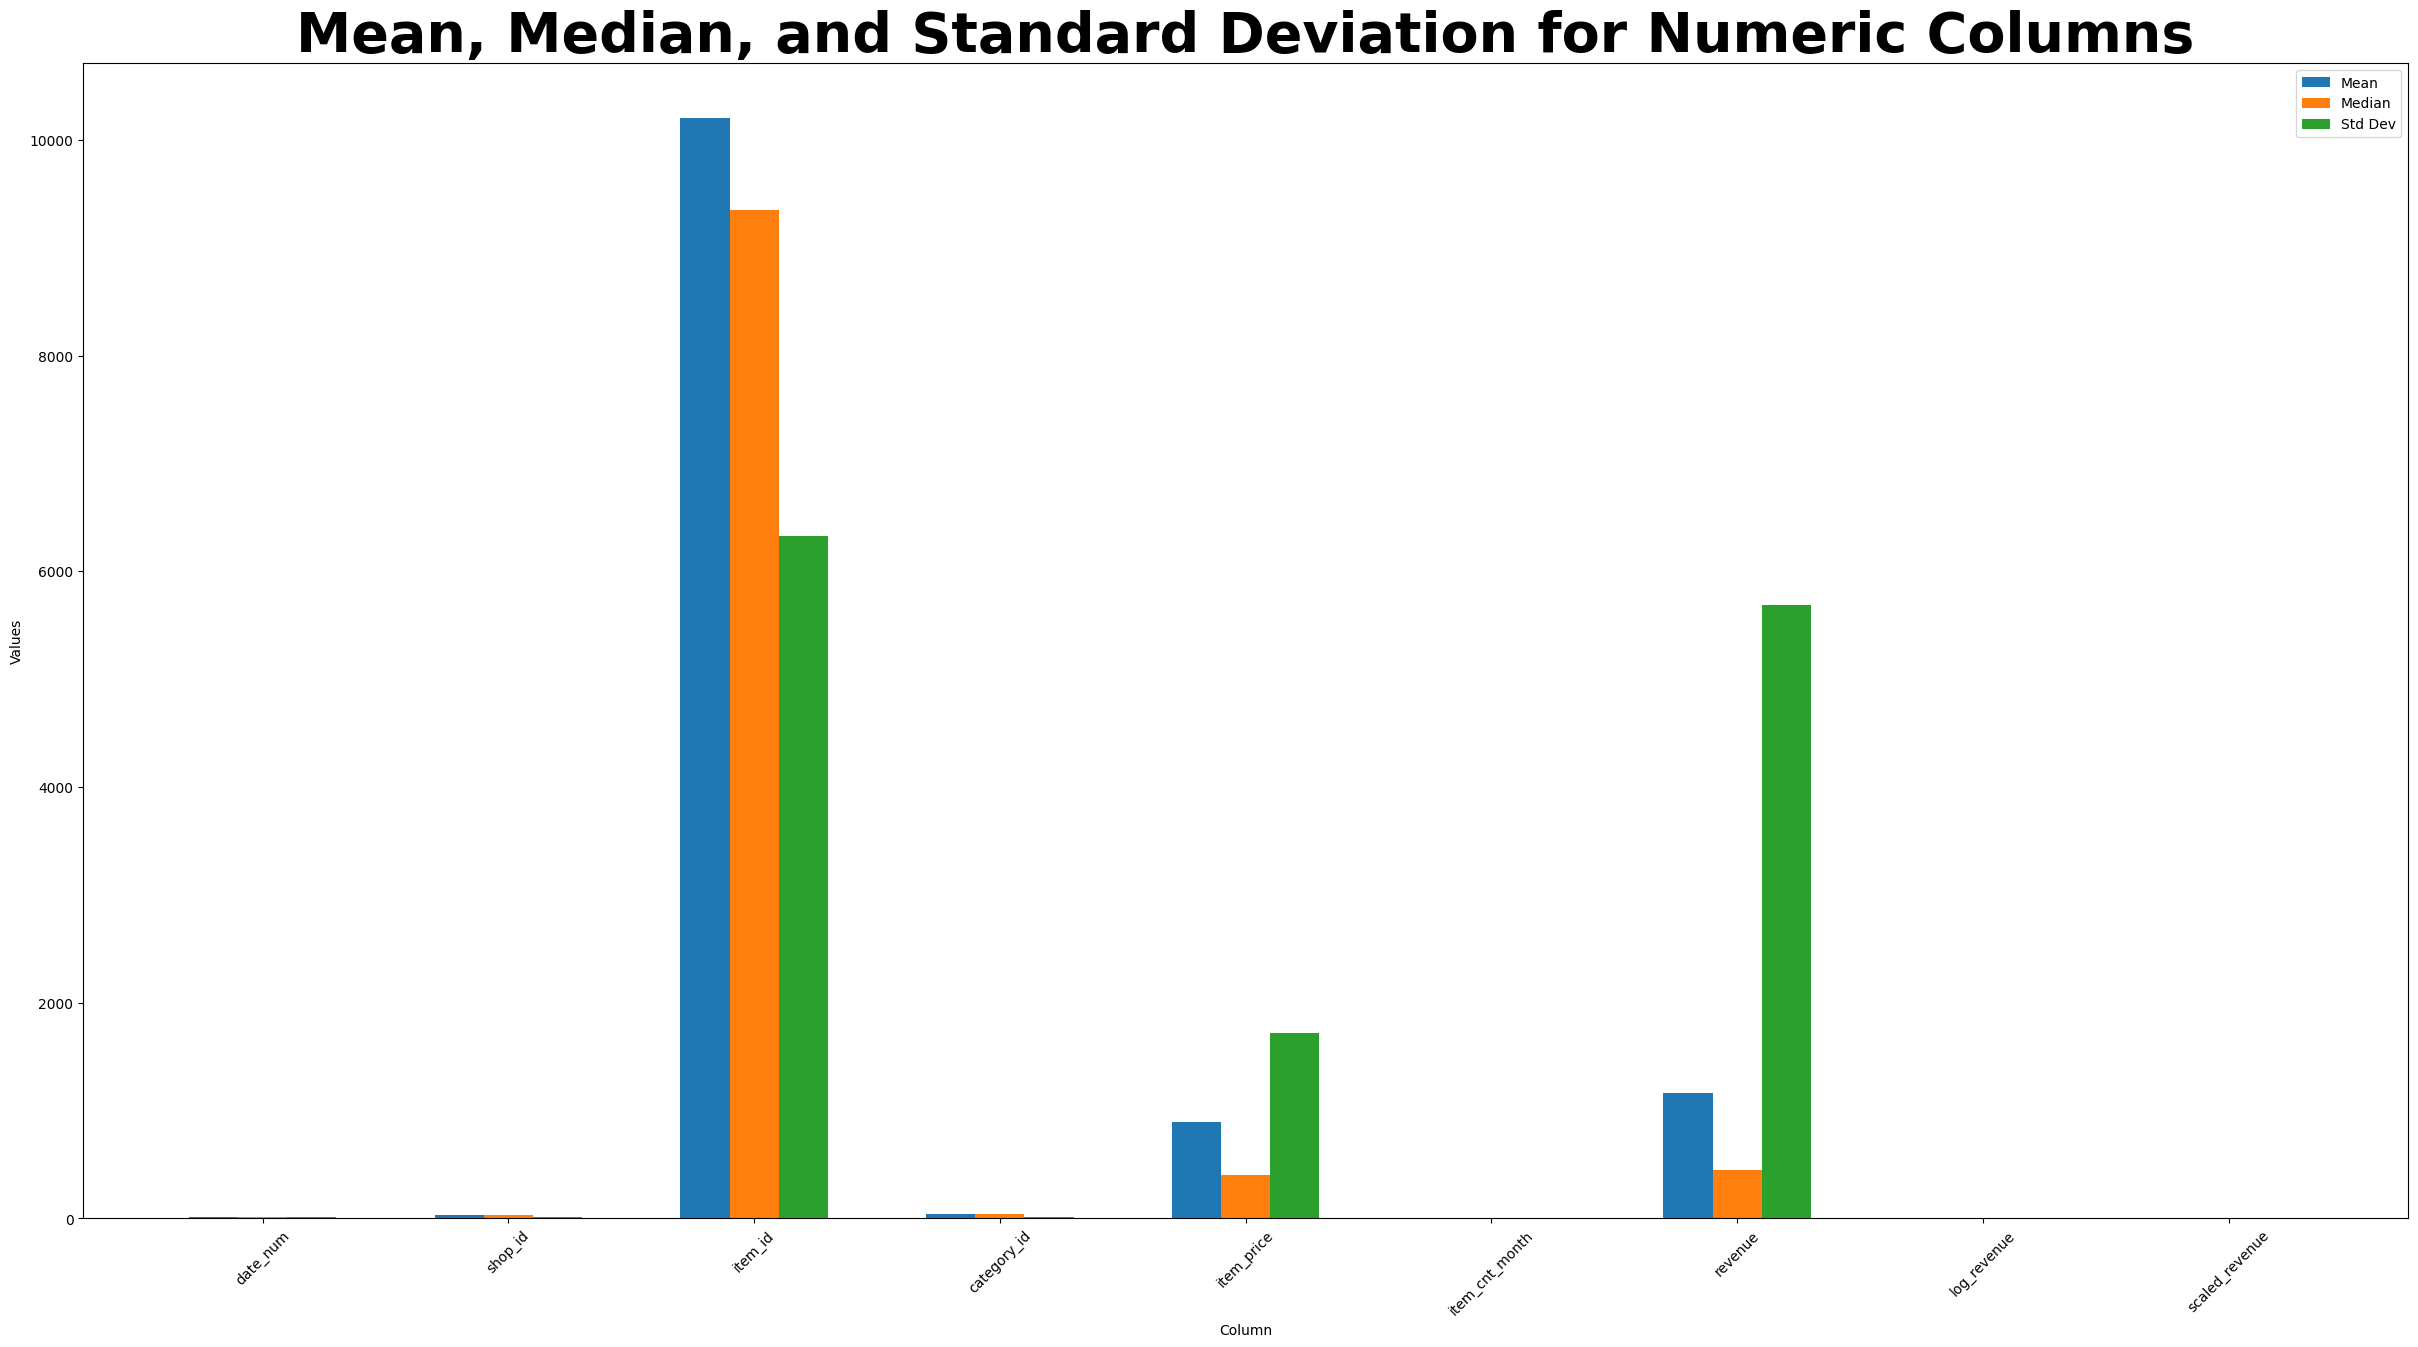

In [353]:
numeric_columns = final_dataset.select_dtypes(include=['float64', 'int64'])

means = [final_dataset[column].mean() for column in numeric_columns]
medians = [final_dataset[column].median() for column in numeric_columns]
std_devs = [final_dataset[column].std() for column in numeric_columns]
column_names = list(numeric_columns.columns)

x = np.arange(len(column_names))
bar_width = 0.2

plt.figure(figsize=(30, 15))
plt.bar(x - bar_width, means, width=bar_width, label='Mean', align='center')
plt.bar(x, medians, width=bar_width, label='Median', align='center')
plt.bar(x + bar_width, std_devs, width=bar_width, label='Std Dev', align='center')

plt.xlabel('Column')
plt.ylabel('Values')
plt.title('Mean, Median, and Standard Deviation for Numeric Columns', fontweight='bold', fontsize=40)
plt.xticks(x, column_names, rotation=45)
plt.legend()

additional_insights_visualization_widget = pn.pane.Matplotlib(plt.gcf(), width=800)


In [354]:
template = pn.template.VanillaTemplate(
    title='Sales Forecasting Dashboard',
    main=[pn.Row(pn.Column(blank_widget, width=575), pn.Column(total_sales_widget), height=100),
          pn.Row(pn.Column(total_sales_2013_widget), pn.Column(
              total_sales_2014_widget), pn.Column(total_sales_2015_widget)),
          pn.Row(pn.Column(top_sales_per_store_widget, width=500), pn.Column(blank_widget, width=100), pn.Column(
              top_sales_per_store_text_widget), pn.Column(blank_widget, height=50), pn.Column(worst_sales_per_store_text_widget)),
          pn.Row(blank_widget, height=50),
          pn.Row(pn.Column(blank_widget, width=650), pn.Column(
              pn.pane.Markdown('''# Monthly Sales Analysis''', width=500))),
          pn.Row(pn.Column(mean_monthly_sales_widget), pn.Column(
              median_monthly_sales_widget), pn.Column(std_monthly_sales_widget)),
          pn.Row(blank_widget, height=50),
          pn.Row(pn.Column(mean_yearly_sales_widget), pn.Column(average_sales_per_month_widget)),
          pn.Row(pn.Column(blank_widget, width=650), pn.Column(
              pn.pane.Markdown('''# Item Category Analysis''', width=500))),
          pn.Row(pn.Column(top_sales_per_item_category_widget), pn.Column(average_sales_per_item_category_widget)),
          pn.Row(pn.Column(blank_widget, width=650), pn.Column(
              pn.pane.Markdown('''# Average Sales Metrics''', width=500))),
          pn.Row(pn.Column(average_sales_per_store_widget), pn.Column(average_sales_per_store_yearly_widget)),
          pn.Row(pn.Column(average_sales_per_item_widget), pn.Column(average_sales_per_item_yearly_widget)),
          pn.Row(blank_widget, height=100),
            pn.Row(pn.Column(blank_widget, width=150), pn.Column(additional_insights_visualization_widget), pn.Column(pn.Row(blank_widget, height=40), pn.Row(additional_insights_markdown, height=200)))
          ],
    header_background='#FF0000',
)

# template._css = """
# #header {
# position: static !important;
# }
# """

template.show()

Launching server at http://localhost:52940
